Analysis for IndeLLM

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import data
overall = pd.read_csv("../Results/overall.csv")
alldata = pd.read_csv("../Data/Indel_curated.csv")

overall.head()
alldata.head()


/tmp/ipykernel_3388504/3677257036.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,Id_matching,Feature_x,Consequence_x,Protein_start,Protein_stop,wt,mut,seq,GeneID,...,DDD subset (n=151),CADD,CAPICE,FATHMM-indel,MutPredIndel,MutationTaster2021,PROVEAN,SIFT-indel,VEST-indel,VVP
0,0,0,ENST00000379198.5,inframe_insertion,4,NaN,L,LRRAWR,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENSG00000176022,...,No,12.37,0.073788,0.194999931,0.61176,Benign,-3.44,damaging,0.05,7.0
1,1,1,ENST00000379198.5,inframe_deletion,136,139.0,VLAM,V,MKLLRRAWRRRAALGLGTLALCGAALLYLARCAAEPGDPRAMSGRS...,ENSG00000176022,...,No,22.40,0.448487,0.912278105,0.71407,Deleterious,-11.00,damaging,0.23,98.0
2,2,2,ENST00000476993.2,inframe_deletion,61,69.0,VAPLPLGTG,V,MLPWTALGLALSLRLALARSGAERGPPASAPRGDLMFLLDSSASVS...,ENSG00000179403,...,No,21.60,0.570002,0.99589538,0.60790,Deleterious,-27.11,neutral,0.07,100.0
3,3,3,ENST00000404249.8,inframe_deletion,312,314.0,EEE,E,MGDEKDSWKVKTLDEILQEKKRRKEQEEKAEIKRLKNSDDRDSKRD...,ENSG00000008128,...,No,15.81,0.005563,0.466641233,0.11935,Benign,-2.76,neutral,0.10,15.0
4,4,4,ENST00000341426.9,inframe_deletion,445,446.0,EG,G,MEMEQEKMTMNKELSPDAAAYCCSACHGDETWSYNHPIRGRAKSRS...,ENSG00000008130,...,No,6.09,0.001876,0.008217187,0.38066,Benign,-1.90,damaging,0.29,95.0


In [2]:
import numpy as np

#Add indel type (insertion or deletion) info
overall['indel'] = overall.apply(lambda row: 'deletion' if row['length_mut'] < row['length_wt'] else 'insertion', axis=1)

#Add indel length 
overall['length_indel'] = overall.apply(lambda row: row['length_wt'] - row['length_mut'] if row['indel'] == 'deletion' else row['length_mut'] - row['length_wt'], axis=1) 

#Add difference of fitness (positive value positive effect, negative value negative effect)
overall['dif_evo'] = overall['evo_mut'] - overall['evo_wt']
overall['dif_fit'] = overall['fit_mut'] - overall['fit_wt']

#Add a cleaned up labels info
overall['labels_cleaned'] = np.where(overall['label'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(overall['label'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

overall.head()

,pair_id,length_mut,length_wt,evo_mut,evo_wt,fit_mut,fit_wt,label,indel,length_indel,dif_evo,dif_fit,labels_cleaned
0,0,334,329,300.976887,295.771454,183.474468,181.478358,Benign/Likely benign,insertion,5,5.205434,1.996110,Benign
1,1,326,329,289.070291,295.771454,175.395118,181.483721,Pathogenic,deletion,3,-6.701162,-6.088603,Pathogenic
2,2,437,445,394.023689,407.087317,202.841284,211.450276,Likely pathogenic,deletion,8,-13.063628,-8.608993,Pathogenic
3,4,445,446,407.261862,408.398288,197.364461,198.448622,likely benign,deletion,1,-1.136426,-1.084161,Benign
4,5,339,340,279.895415,282.956223,169.600709,175.565114,Pathogenic,deletion,1,-3.060808,-5.964405,Pathogenic


In [3]:
#Calculating the average dif values per bening and pathogenic
evomeanpath = overall[overall['labels_cleaned'] == 'Pathogenic']['dif_evo'].mean()
evomeanbeg = overall[overall['labels_cleaned'] == 'Benign']['dif_evo'].mean()

fitmeanpath = overall[overall['labels_cleaned'] == 'Pathogenic']['dif_fit'].mean()
fitmeanbeg = overall[overall['labels_cleaned'] == 'Benign']['dif_fit'].mean()

print("Evo Model, mean for pathogenic indels:", evomeanpath)
print("Evo Model, mean for begign indels:", evomeanbeg)
print("Fit Model, mean for pathogenic indels:", fitmeanpath)
print("Fit Model, mean for benign indels", fitmeanbeg)

Evo Model, mean for pathogenic indels: -3.6320691402532517
Evo Model, mean for begign indels: -1.2970779419085199
Fit Model, mean for pathogenic indels: -3.4223875154260623
Fit Model, mean for benign indels -0.4614182559092736


Text(0, 0.5, 'Difference Evo Model')

Text(0.5, 0, 'Ids of indels')

Text(0.5, 1.0, 'Evo difference per indel, colored by true labels')

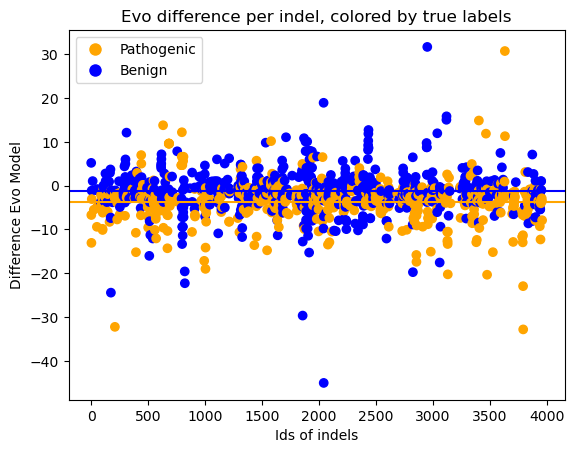

Text(0, 0.5, 'Difference Fit Model')

Text(0.5, 0, 'Ids of indels')

Text(0.5, 1.0, 'Fit difference per indel, colored by true labels')

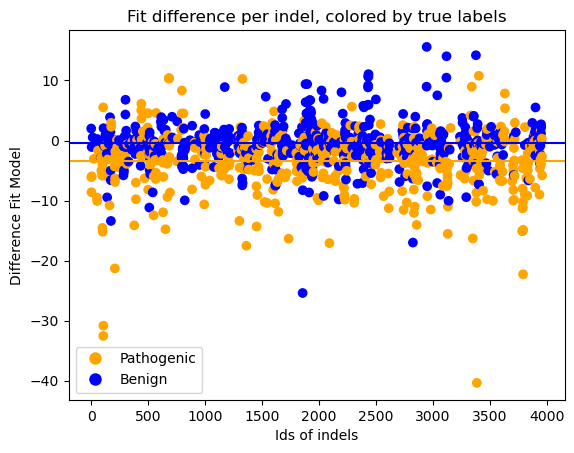

Text(0.5, 0, 'fit')

Text(0, 0.5, 'evo')

Text(0.5, 1.0, 'Comapring the Fit and Evo difference scores, colored by true labels')

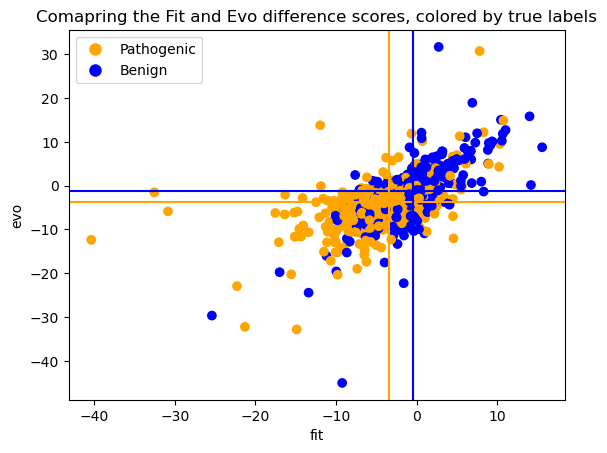

In [4]:
import matplotlib.pyplot as plt

#Creating colors for labels
color_map = {'Pathogenic': 'orange', 'Benign': 'blue'}
colors = overall['labels_cleaned'].map(color_map)
legend_labels = {label: color for label, color in color_map.items() if label in overall['labels_cleaned'].unique()}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
           for label, color in legend_labels.items()]

#Plotting evo scores
plt.scatter(overall['pair_id'],overall['dif_evo'], c=colors)
plt.ylabel('Difference Evo Model')
plt.xlabel('Ids of indels')
plt.title('Evo difference per indel, colored by true labels')
plt.axhline(y=evomeanpath, color = 'orange')
plt.axhline(y=evomeanbeg, color = 'blue')
plt.legend(handles=handles, loc = 'best')
plt.show()

#Plotting fit scores
plt.scatter(overall['pair_id'],overall['dif_fit'], c=colors)
plt.ylabel('Difference Fit Model')
plt.xlabel('Ids of indels')
plt.title('Fit difference per indel, colored by true labels')
plt.axhline(y=fitmeanpath, color = 'orange')
plt.axhline(y=fitmeanbeg, color = 'blue')
plt.legend(handles=handles, loc = 'best')
plt.show()

#Plotting evo and fit scores together
plt.scatter(overall['dif_fit'], overall['dif_evo'], c=colors)
plt.xlabel('fit')
plt.ylabel('evo')
plt.title('Comapring the Fit and Evo difference scores, colored by true labels')
plt.axhline(y=evomeanpath, color = 'orange')
plt.axhline(y=evomeanbeg, color = 'blue')
plt.axvline(x=fitmeanpath, color = 'orange')
plt.axvline(x=fitmeanbeg, color = 'blue')
plt.legend(handles=handles, loc = 'best')
plt.show()

In [5]:
#identifying the low scoring benign
fit_under10 = overall.loc[(overall['labels_cleaned'] == 'Benign') & (overall['dif_fit'] < -10)]
print(fit_under10)

#Partly explained by indel size. Removed indels larger than 10bp
overall_small = overall[overall['length_indel'] < 11]

     pair_id  length_mut  length_wt     evo_mut      evo_wt     fit_mut  \
46       173          65         89   50.657067   75.090821   11.368289   
128      510         104        120   87.960535  103.989124   23.302300   
484     1856         387        419  324.009807  353.677322  132.405266   
817     2824         403        423  330.160794  349.916364  140.703721   
906     3137         457        464  368.514415  375.380665  162.916523   

         fit_wt          label     indel  length_indel    dif_evo    dif_fit  \
46    24.760969  likely benign  deletion            24 -24.433754 -13.392679   
128   34.468675  likely benign  deletion            16 -16.028588 -11.166375   
484  157.797233  likely benign  deletion            32 -29.667515 -25.391967   
817  157.693906  likely benign  deletion            20 -19.755570 -16.990184   
906  172.963818  likely benign  deletion             7  -6.866250 -10.047295   

    labels_cleaned  
46          Benign  
128         Benign  
484  

In [6]:
#Re-calculate a new mean for the small indels
evomeanpathsmall = overall_small[overall_small['labels_cleaned'] == 'Pathogenic']['dif_evo'].mean()
evomeanbegsmall = overall_small[overall_small['labels_cleaned'] == 'Benign']['dif_evo'].mean()
fitmeanpathsmall = overall_small[overall_small['labels_cleaned'] == 'Pathogenic']['dif_fit'].mean()
fitmeanbegsmall = overall_small[overall_small['labels_cleaned'] == 'Benign']['dif_fit'].mean()

#Compare the new means
print("Evo Model, mean for pathogenic indels:", evomeanpath)
print("Evo Model, mean for small pathogenic indels:", evomeanpathsmall)
print("Evo Model, mean for benign indels:", evomeanbeg)
print("Evo Model, mean for small benign indels:", evomeanbegsmall)

print("Fit Model, mean for pathogenic indels:", fitmeanpath)
print("Fit Model, mean for small pathogenic indels:", fitmeanpathsmall)
print("Fit Model, mean for benign indels", fitmeanbeg)
print("Fit Model, mean for small benign indels", fitmeanbegsmall)

Evo Model, mean for pathogenic indels: -3.6320691402532517
Evo Model, mean for small pathogenic indels: -3.624060709764012
Evo Model, mean for benign indels: -1.2970779419085199
Evo Model, mean for small benign indels: -1.0280902817331419
Fit Model, mean for pathogenic indels: -3.4223875154260623
Fit Model, mean for small pathogenic indels: -3.3614013737602804
Fit Model, mean for benign indels -0.4614182559092736
Fit Model, mean for small benign indels -0.359733203802016


Text(0, 0.5, 'Difference Evo Model')

Text(0.5, 0, 'Ids for indels')

Text(0.5, 1.0, 'Evo difference per small indel, colored by true labels')

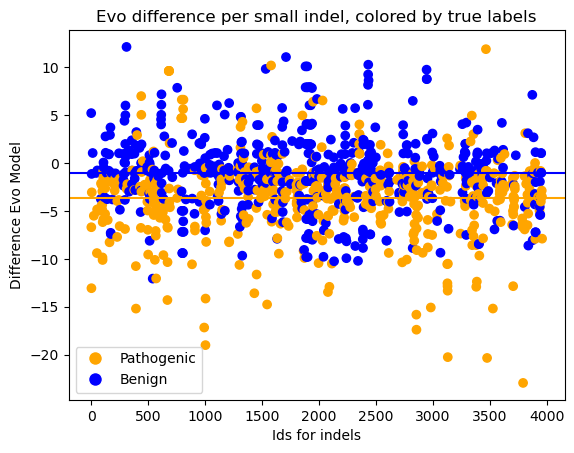

Text(0, 0.5, 'Difference Fit Model ')

Text(0.5, 0, 'Ids for indels')

Text(0.5, 1.0, 'Fit difference per small indel, colored by true labels')

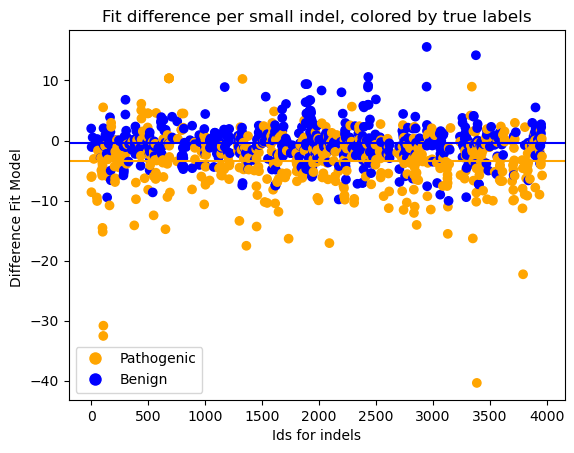

Text(0.5, 0, 'Difference Fit Model')

Text(0, 0.5, 'Difference Evo Model')

Text(0.5, 1.0, 'Comapring the Fit and Evo difference scores for small indels, colored by true labels ')

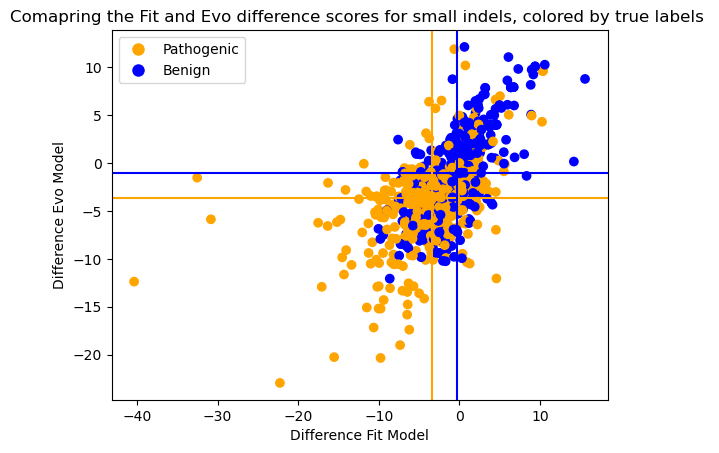

<Axes: xlabel='labels_cleaned', ylabel='dif_evo'>

Text(0.5, 1.0, 'Evo Model')

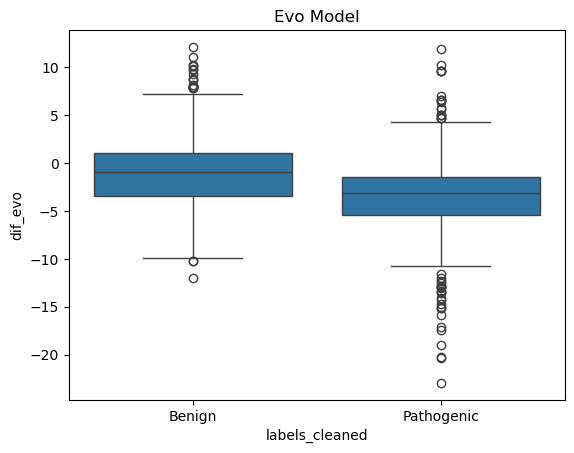

<Axes: xlabel='labels_cleaned', ylabel='dif_fit'>

Text(0.5, 1.0, 'Fit Model')

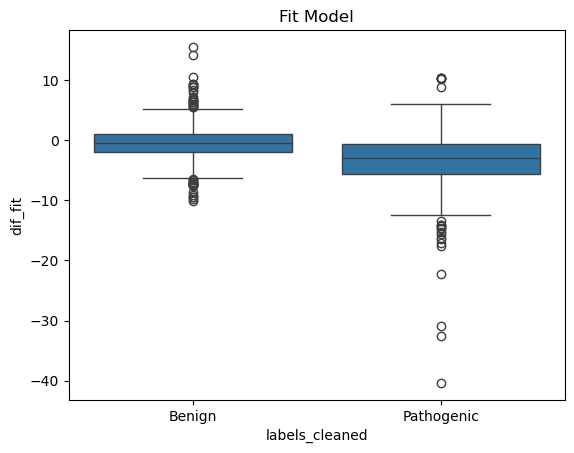

In [7]:
import seaborn as sns
#Plotting for only indels of 10bp or less

#Creating a new colormap for the labels
colors_small = overall_small['labels_cleaned'].map(color_map)
legend_labels_small = {label: color for label, color in color_map.items() if label in overall_small['labels_cleaned'].unique()}
handles_small = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
           for label, color in legend_labels_small.items()]

#Plotting evo scores for small indels
plt.scatter(overall_small['pair_id'],overall_small['dif_evo'], c=colors_small)
plt.ylabel('Difference Evo Model')
plt.xlabel('Ids for indels')
plt.title('Evo difference per small indel, colored by true labels')
plt.axhline(y=evomeanpathsmall, color = 'orange')
plt.axhline(y=evomeanbegsmall, color = 'blue')
plt.legend(handles=handles_small, loc = 'best')
plt.show()

#Plotting fit scores for small indels
plt.scatter(overall_small['pair_id'],overall_small['dif_fit'], c=colors_small)
plt.ylabel('Difference Fit Model ')
plt.xlabel('Ids for indels')
plt.title('Fit difference per small indel, colored by true labels')
plt.axhline(y=fitmeanpathsmall, color = 'orange')
plt.axhline(y=fitmeanbegsmall, color = 'blue')
plt.legend(handles=handles_small, loc = 'best')
plt.show()

#Plotting fit and evo scores for small indels
plt.scatter(overall_small['dif_fit'], overall_small['dif_evo'], c=colors_small)
plt.xlabel('Difference Fit Model')
plt.ylabel('Difference Evo Model')
plt.title('Comapring the Fit and Evo difference scores for small indels, colored by true labels ')
plt.axhline(y=evomeanpathsmall, color = 'orange')
plt.axhline(y=evomeanbegsmall, color = 'blue')
plt.axvline(x=fitmeanpathsmall, color = 'orange')
plt.axvline(x=fitmeanbegsmall, color = 'blue')
plt.legend(handles=handles_small, loc = 'best')
plt.show()

#Also included boxplots
sns.boxplot(x = overall_small['labels_cleaned'], y = overall_small['dif_evo'])
plt.title('Evo Model')
plt.show()

sns.boxplot(x = overall_small['labels_cleaned'], y = overall_small['dif_fit'])
plt.title('Fit Model')
plt.show()

F1 score Evo small indels: 0.6646884272997032
F1 score Fit small indels: 0.7087719298245614
Accuracy score Evo small indels: 0.6843575418994413
Accuracy score Fit small indels: 0.6908752327746741
MCC Evo small indels: 0.38728674276774017
MCC Fit small indels: 0.37941166210026483


/tmp/ipykernel_3388504/926566019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_small['labels_binary'] = overall_small.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

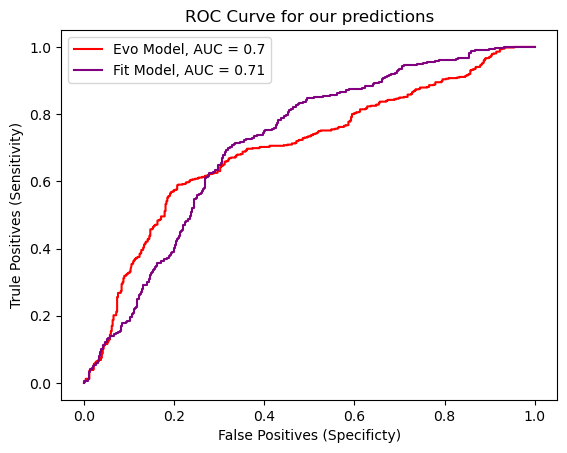

In [8]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef

#Turing the true lables into binary
overall_small['labels_binary'] = overall_small.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)

#Extrating Arrays
truelabels = overall_small['labels_binary'].values
pred_evo = overall_small['dif_evo'].values
pred_fit = overall_small['dif_fit'].values

#Calculating FP, TN and thresholds for Evo and Fit
fpr_evo, tpr_evo, thersholds_evo = metrics.roc_curve(truelabels, pred_evo)
roc_auc_evo = round(metrics.auc(fpr_evo, tpr_evo), 2)

fpr_fit, tpr_fit, thersholds_fit = metrics.roc_curve(truelabels, pred_fit)
roc_auc_fit = round(metrics.auc(fpr_fit, tpr_fit), 2)

#Using the threshold to create a binary table of the predicted values
#Find the best threshold
tresh_evo = thersholds_evo[np.argmax(tpr_evo - fpr_evo)]
tresh_fit = thersholds_fit[np.argmax(tpr_fit - fpr_fit)]

#Converting the continous predictions into binary
pred_evo_bin = [1 if x >= tresh_evo else 0 for x in pred_evo]
pred_fit_bin = [1 if x >= tresh_fit else 0 for x in pred_fit]

#Calculating F1 score
f1_evo = f1_score(truelabels, pred_evo_bin, average = 'binary')
f1_fit = f1_score(truelabels, pred_fit_bin, average = 'binary')

print("F1 score Evo small indels:", f1_evo)
print("F1 score Fit small indels:", f1_fit)

#Calculating accuary score
accuracy_evo = accuracy_score(truelabels, pred_evo_bin)
accuracy_fit = accuracy_score(truelabels, pred_fit_bin)

print("Accuracy score Evo small indels:", accuracy_evo)
print("Accuracy score Fit small indels:", accuracy_fit)

#Calculating MCC
mcc_evo = matthews_corrcoef(truelabels, pred_evo_bin)
mcc_fit = matthews_corrcoef(truelabels, pred_fit_bin)

print("MCC Evo small indels:", mcc_evo)
print("MCC Fit small indels:", mcc_fit)

#Plotting the Evo and Fit AUC 
plt.plot(fpr_evo, tpr_evo, label = "Evo Model, AUC = "+str(roc_auc_evo), color = "red")
plt.plot(fpr_fit, tpr_fit, label = "Fit Model, AUC = "+str(roc_auc_fit), color = "purple")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

Number of indels: 1074
Correctly called by Evo: 735
Correctly called by Fit: 742
Correctly called by both: 605
Failed by both: 202
Failed by Evo, but correcly by Fit: 137
Failed by Fit, but correcly by Evo: 130


<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Procentage of indel type')

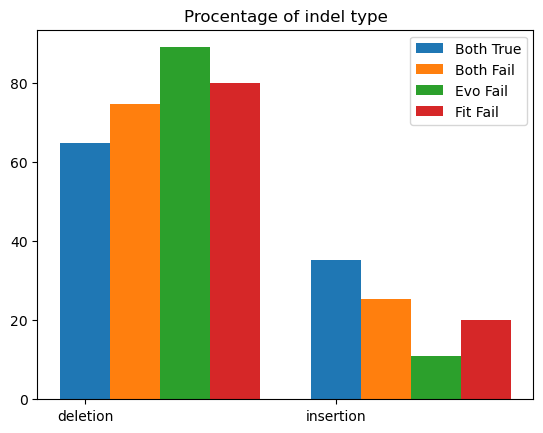

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Procentage of indel size')

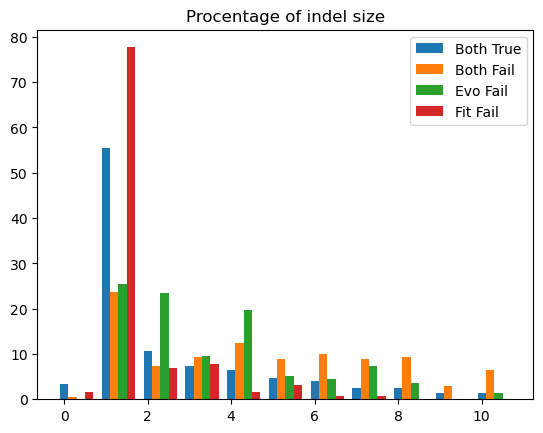

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x7ba94188f110>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2-4'), Text(3, 0, '5-10')])

Text(0.5, 1.0, 'Procentage of indel size')

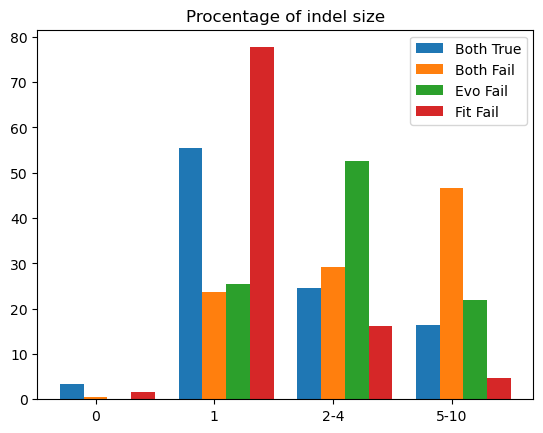

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x7ba941805cd0>,
 [Text(0, 0, '0-250'), Text(1, 0, '251-500')])

Text(0.5, 1.0, 'Procentage of wt aa length')

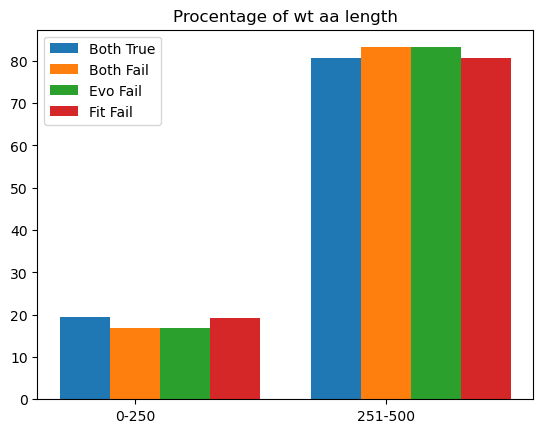

In [51]:
# Differences between Evo and Fit model
sum = pd.DataFrame(overall_small['pair_id'], columns=['pair_id'])
sum['labels_cleaned'] = overall_small['labels_cleaned']
sum['Indel size'] = overall_small['length_indel']
sum['Indel type'] = overall_small['indel']
sum['Protein length'] = overall_small['length_wt']
sum['Evo_scores'] = pred_evo_bin
sum['Fit_scores'] = pred_fit_bin

#Check which IDs the model calls correctly
sum['Evo_correct'] = None 
sum['Fit_correct'] = None
sum.loc[((sum['Evo_scores'] == 1) & (sum['labels_cleaned'] == 'Benign')) | 
        ((sum['Evo_scores'] == 0) & (sum['labels_cleaned'] == 'Pathogenic')), 'Evo_correct'] = 'True'
sum.loc[((sum['Fit_scores'] == 1) & (sum['labels_cleaned'] == 'Benign')) | 
        ((sum['Fit_scores'] == 0) & (sum['labels_cleaned'] == 'Pathogenic')), 'Fit_correct'] = 'True'

#Dataframes with correcly called by both, failed by both, and what one manages and the other don't
Evocorrect = sum.loc[((sum['Evo_correct'] == 'True'))]
Fitcorrect = sum.loc[((sum['Fit_correct'] == 'True'))]
BothTrue = sum.loc[((sum['Evo_correct'] == 'True') & (sum['Fit_correct'] == 'True'))]
BothFail = sum.loc[((sum['Evo_correct'].isnull()) & (sum['Fit_correct'].isnull()))]
EvoFail = sum.loc[((sum['Evo_correct'].isnull()) & (sum['Fit_correct'] == 'True'))]
FitFail = sum.loc[((sum['Evo_correct'] == 'True') & (sum['Fit_correct'].isnull()))]


print("Number of indels:", len(sum))
print("Correctly called by Evo:", len(Evocorrect))
print("Correctly called by Fit:", len(Fitcorrect))
print("Correctly called by both:", len(BothTrue))
print("Failed by both:", len(BothFail))
print("Failed by Evo, but correcly by Fit:", len(EvoFail))
print("Failed by Fit, but correcly by Evo:", len(FitFail))

#Check if its related to type of indel
BothTrue_indeltype = BothTrue['Indel type'].value_counts()
BothFail_indeltype = BothFail['Indel type'].value_counts()
EvoFail_indeltype = EvoFail['Indel type'].value_counts()
FitFail_indeltype = FitFail['Indel type'].value_counts()

plt.bar(BothTrue_indeltype.index, ((BothTrue_indeltype.values / len(BothTrue)) * 100), 0.2, label = 'Both True')
plt.bar(np.arange(len(BothFail_indeltype.index)) + 0.2, ((BothFail_indeltype.values / len(BothFail)) * 100), 0.2, label = 'Both Fail')
plt.bar(np.arange(len(EvoFail_indeltype.index)) + 0.4, ((EvoFail_indeltype.values / len(EvoFail)) * 100), 0.2, label = 'Evo Fail')
plt.bar(np.arange(len(FitFail_indeltype.index)) + 0.6, ((FitFail_indeltype.values / len(FitFail)) * 100), 0.2, label = 'Fit Fail')
plt.legend(loc = 'best')
plt.title('Procentage of indel type')
plt.show()

#Check if its related to indel size
BothTrue_indelsize = BothTrue['Indel size'].value_counts()
BothFail_indelsize = BothFail['Indel size'].value_counts()
EvoFail_indelsize = EvoFail['Indel size'].value_counts()
FitFail_indelsize = FitFail['Indel size'].value_counts()

indelsize = pd.DataFrame({
    'BothTrue': BothTrue_indelsize,
    'BothFail': BothFail_indelsize,
    'EvoFail': EvoFail_indelsize,
    'FitFail': FitFail_indelsize
}).fillna(0)

plt.bar(np.arange(len(indelsize)), ((indelsize['BothTrue'] / len(BothTrue)) * 100), 0.2, label = 'Both True')
plt.bar(np.arange(len(indelsize)) + 0.2, ((indelsize['BothFail'] / len(BothFail)) * 100), 0.2, label = 'Both Fail')
plt.bar(np.arange(len(indelsize)) + 0.4, ((indelsize['EvoFail'] / len(EvoFail)) * 100), 0.2, label = 'Evo Fail')
plt.bar(np.arange(len(indelsize)) + 0.6, ((indelsize['FitFail'] / len(FitFail)) * 100), 0.2, label = 'Fit Fail')
plt.legend(loc = 'best')
plt.title('Procentage of indel size')
plt.show()

#Group the indel sizes after Cannon et al. 2023 ((0), 1, 2-4, 5-10 and 11+)

indels2to4 = indelsize.loc[2:4].sum()
indels5to10 = indelsize.loc[5:10].sum()

indelsize_grouped = pd.DataFrame({
    'Indel size': ['0', '1', '2-4', '5-10'],
    'BothTrue': [indelsize.loc[0, 'BothTrue'], indelsize.loc[1, 'BothTrue'], indels2to4['BothTrue'], indels5to10['BothTrue']],
    'BothFail': [indelsize.loc[0, 'BothFail'], indelsize.loc[1, 'BothFail'], indels2to4['BothFail'], indels5to10['BothFail']],
    'EvoFail': [indelsize.loc[0, 'EvoFail'], indelsize.loc[1, 'EvoFail'], indels2to4['EvoFail'], indels5to10['EvoFail']],
    'FitFail': [indelsize.loc[0, 'FitFail'], indelsize.loc[1, 'FitFail'], indels2to4['FitFail'], indels5to10['FitFail']]
})

labels = ['0', '1', '2-4', '5-10']

plt.bar(np.arange(len(indelsize_grouped)) - 0.2, ((indelsize_grouped['BothTrue'] / len(BothTrue)) * 100), 0.2, label = 'Both True')
plt.bar(np.arange(len(indelsize_grouped)), ((indelsize_grouped['BothFail'] / len(BothFail)) * 100), 0.2, label = 'Both Fail')
plt.bar(np.arange(len(indelsize_grouped)) + 0.2, ((indelsize_grouped['EvoFail'] / len(EvoFail)) * 100), 0.2, label = 'Evo Fail')
plt.bar(np.arange(len(indelsize_grouped)) + 0.4, ((indelsize_grouped['FitFail'] / len(FitFail)) * 100), 0.2, label = 'Fit Fail')
plt.xticks(np.arange(len(indelsize_grouped)), labels)
plt.legend(loc = 'best')
plt.title('Procentage of indel size')
plt.show()

#Check if the protein length makes a difference
BothTrue_aasize = BothTrue['Protein length'].value_counts()
BothFail_aasize = BothFail['Protein length'].value_counts()
EvoFail_aasize = EvoFail['Protein length'].value_counts()
FitFail_aasize = FitFail['Protein length'].value_counts()

aasize = pd.DataFrame({
    'BothTrue': BothTrue_aasize,
    'BothFail': BothFail_aasize,
    'EvoFail': EvoFail_aasize,
    'FitFail': FitFail_aasize
}).fillna(0)

aaranges = [(0, 100), (101, 200), (201, 300), (301, 400), (401, 500)]
aaranges2 = [(0, 250), (251, 500)]

summarized_data = {
    'Range': [],
    'BothTrue': [],
    'BothFail': [],
    'EvoFail': [],
    'FitFail': []
}

for start, end in aaranges2:
    range_label = f'{start}-{end}'
    range_sum = aasize.loc[start:end].sum()
    
    summarized_data['Range'].append(range_label)
    summarized_data['BothTrue'].append(range_sum['BothTrue'])
    summarized_data['BothFail'].append(range_sum['BothFail'])
    summarized_data['EvoFail'].append(range_sum['EvoFail'])
    summarized_data['FitFail'].append(range_sum['FitFail'])

# Creating a new DataFrame with the summarized values
summarized_df = pd.DataFrame(summarized_data)

labels = ['0-100', '101-200', '201-300', '301-400', '401-500']
labels2 = ['0-250', '251-500']

plt.bar(np.arange(len(summarized_df)) - 0.2, ((summarized_df['BothTrue'] / len(BothTrue)) * 100), 0.2, label = 'Both True')
plt.bar(np.arange(len(summarized_df)), ((summarized_df['BothFail'] / len(BothFail)) * 100), 0.2, label = 'Both Fail')
plt.bar(np.arange(len(summarized_df)) + 0.2, ((summarized_df['EvoFail'] / len(EvoFail)) * 100), 0.2, label = 'Evo Fail')
plt.bar(np.arange(len(summarized_df)) + 0.4, ((summarized_df['FitFail'] / len(FitFail)) * 100), 0.2, label = 'Fit Fail')
plt.xticks(np.arange(len(summarized_df)), labels2)
plt.legend(loc = 'best')
plt.title('Procentage of wt aa length')
plt.show()



F1 score Evo small indels: 0.6646884272997032
F1 score Fit small indels: 0.7087719298245614
F1 score Combined mean small indels: 0.6963788300835655
F1 score Combined best small indels: 0.8146788990825689
Accuracy score Evo small indels: 0.6843575418994413
Accuracy score Fit small indels: 0.6908752327746741
Accuracy score Combined mean small indels: 0.6955307262569832
Accuracy score Combined best small indels: 0.8119180633147114
MCC Evo small indels: 0.38728674276774017
MCC Fit small indels: 0.37941166210026483
MCC Combined small mean indels: 0.3961707161905172
MCC Combined small best indels: 0.6275695037463944


/tmp/ipykernel_3388504/2599791934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_small['Evo_correct'] = None
/tmp/ipykernel_3388504/2599791934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_small['Fit_correct'] = None
/tmp/ipykernel_3388504/2599791934.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions combined')

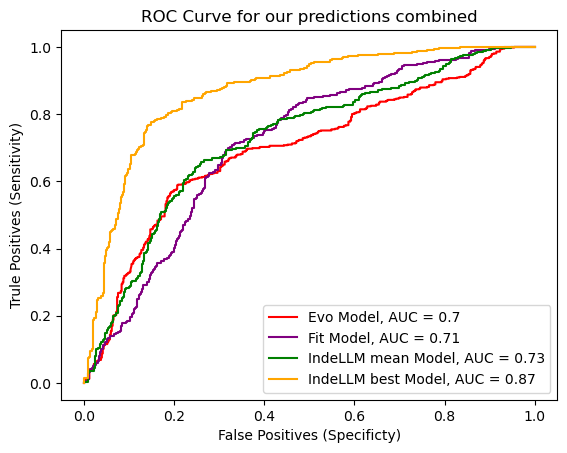

In [56]:
#Try to add the methods together

#Extrating Arrays
truelabels = overall_small['labels_binary'].values

#combinding by using the mean value
pred_combined = (pred_evo + pred_fit) / 2 

#Identifying the correct predictions by using their thresholds. 
overall_small['Evo_correct'] = None 
overall_small['Fit_correct'] = None
overall_small.loc[((overall_small['dif_evo'] >= tresh_evo) & (overall_small['labels_cleaned'] == 'Benign')) | 
        ((overall_small['dif_evo'] < tresh_evo) & (overall_small['labels_cleaned'] == 'Pathogenic')), 'Evo_correct'] = 'True'
overall_small.loc[((overall_small['dif_fit'] >= tresh_fit) & (overall_small['labels_cleaned'] == 'Benign')) | 
        ((overall_small['dif_fit'] < tresh_fit) & (overall_small['labels_cleaned'] == 'Pathogenic')), 'Fit_correct'] = 'True'

# Combind by using the best values
# If both true or both fail, use the best value (highest if benign, lowest if pathogenic). If only one is True, use the value from the model that is True. 
def calculate_best_dif(row):
    if row['Evo_correct'] and row['Fit_correct']:
        if row['labels_binary'] == 1:
            return max(row['dif_evo'], row['dif_fit'])
        else:
            return min(row['dif_evo'], row['dif_fit'])
    elif row['Evo_correct'] and pd.isna(row['Fit_correct']):
        return row['dif_evo']
    elif pd.isna(row['Evo_correct']) and row['Fit_correct']:
        return row['dif_fit']
    elif pd.isna(row['Evo_correct']) and pd.isna(row['Fit_correct']):
        if row['labels_binary'] == 1:
            return max(row['dif_evo'], row['dif_fit'])
        else:
            return min(row['dif_evo'], row['dif_fit'])
    else:
        return np.nan  # In case there are any other combinations which are not covered

overall_small['dif_best'] = overall_small.apply(calculate_best_dif, axis=1)

pred_best = overall_small['dif_best'].values

#Calculating FP, TN and thresholds
fpr_combined, tpr_combined, thersholds_combined = metrics.roc_curve(truelabels, pred_combined)
roc_auc_combined = round(metrics.auc(fpr_combined, tpr_combined), 2)

fpr_best, tpr_best, thersholds_best = metrics.roc_curve(truelabels, pred_best)
roc_auc_best = round(metrics.auc(fpr_best, tpr_best), 2)

#Using the threshold to create a binary table of the predicted values
#Find the best threshold
tresh_combined = thersholds_combined[np.argmax(tpr_combined - fpr_combined)]
tresh_best = thersholds_best[np.argmax(tpr_best - fpr_best)]

#Converting the continous predictions into binary
pred_combined_bin = [1 if x >= tresh_combined else 0 for x in pred_combined]
pred_best_bin = [1 if x >= tresh_best else 0 for x in pred_best]

#Calculating F1 score
f1_combined = f1_score(truelabels, pred_combined_bin, average = 'binary')
f1_best = f1_score(truelabels, pred_best_bin, average = 'binary')

#Calculating accuary score
accuracy_combined = accuracy_score(truelabels, pred_combined_bin)
accuracy_best = accuracy_score(truelabels, pred_best_bin)

#Calculating MCC
mcc_combined = matthews_corrcoef(truelabels, pred_combined_bin)
mcc_best = matthews_corrcoef(truelabels, pred_best_bin)

print("F1 score Evo small indels:", f1_evo)
print("F1 score Fit small indels:", f1_fit)
print("F1 score Combined mean small indels:", f1_combined)
print("F1 score Combined best small indels:", f1_best)

print("Accuracy score Evo small indels:", accuracy_evo)
print("Accuracy score Fit small indels:", accuracy_fit)
print("Accuracy score Combined mean small indels:", accuracy_combined)
print("Accuracy score Combined best small indels:", accuracy_best)

print("MCC Evo small indels:", mcc_evo)
print("MCC Fit small indels:", mcc_fit)
print("MCC Combined small mean indels:", mcc_combined)
print("MCC Combined small best indels:", mcc_best)

#Plotting the Evo and Fit AUC 
plt.plot(fpr_evo, tpr_evo, label = "Evo Model, AUC = "+str(roc_auc_evo), color = "red")
plt.plot(fpr_fit, tpr_fit, label = "Fit Model, AUC = "+str(roc_auc_fit), color = "purple")
plt.plot(fpr_combined, tpr_combined, label = "IndeLLM mean Model, AUC = "+str(roc_auc_combined), color = "green")
plt.plot(fpr_best, tpr_best, label = "IndeLLM best Model, AUC = "+str(roc_auc_best), color = "orange")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions combined")
plt.legend(loc = 'best')
plt.show()

In [11]:
#Compare to the other indel predictors

#Extract the IDs that we kept from the original dataset, and clean up labels
keptlabels = alldata[alldata['Id_matching'].isin(overall_small['pair_id'])]
keptlabels['labels_cleaned'] = np.where(keptlabels['Classification'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(keptlabels['Classification'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

keptlabels['labels_binary'] = keptlabels.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)
truelabels = overall_small['labels_binary'].values


/tmp/ipykernel_3388504/1168156627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['labels_cleaned'] = np.where(keptlabels['Classification'].str.contains('benign', case=False, na=False),
/tmp/ipykernel_3388504/1168156627.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['labels_binary'] = keptlabels.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)


VEST-Indel: Douville et al. 2015 (https://onlinelibrary.wiley.com/doi/full/10.1002/humu.22911)

From method section: 

A curated set of in-frame and frameshift indels (microdeletions and microinsertions) of ≤20 base-pairs in length, annotated as being pathogenic from publications in the biomedical literature, was downloaded from Human Gene Mutation Database [Stenson et al., 2014] (2014v.3). Only high-confidence annotations with the “DM” designation were included. A second curated set of in-frame and frameshift indels was downloaded from the NCBI ClinVar database on August 7, 2014. Only entries annotated as “likely pathogenic” (Clinical Significance 4) or “pathogenic” (Clinical Significance 5) and not annotated as a somatic mutation were included. Any entry from ClinVar that was also present in HGMD was removed from the ClinVar set. Annotated in-frame and frameshift variants were downloaded from the Exome Variant Server using (ESP6500SI-V2-SSA137) [Fu et al., 2013] and from the 1000 Genomes Project Phase 3 (ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/) [Clarke et al., 2012]. To increase the likelihood that variants from the Exome Variant Server and 1000 Genomes Project were benign common polymorphisms, and to retain sufficient variants for our training set, we only used variants with a minor allele frequency (MAF) ≥0.01 and occurring in either African individuals or those of African ancestry. In ESP600, these were identified as “African-American” and in 1000G as the AFR superpopulation comprising YRI (Yoruba in Ibadan, Nigeria), LWK (luhya in Webuye, Kenya), GWD (Gambian in Western Divisions in the Gambia), MSL (Mende in Sierra Leone), ESN (Esan in Nigeria), ASW (Americans of African ancestry in SW USA), and ACG (African Caribbeans in Barbados). The other populations represented in ESP6500 and 1000G are believed to have experienced severe bottlenecks in recent history, and hence individuals from these populations may harbor potentially pathogenic variants at higher MAF than individuals of African ancestry [Lohmueller et al., 2008; MacArthur and Tyler-Smith, 2010; Ng et al., 2008; Hu and Ng, 2012]. A curated set of putatively benign in-frame and frameshift indels, derived from pairwise genome alignments of human and cow, dog, horse, chimpanzee, rhesus macaque, and rat, was generously provided to us by Pauline Ng and Jing Hu. This set had been previously used to train their SIFT-indel classifier [Hu and Ng, 2012; Hu and Ng, 2013]. Additional background information about these data sets, including probability densities for indel length and MAF, are shown in Supp. Figure S1.

,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1033.000000,1033.000000,1033.000000,667.000000,0.0,1.033000e+03,1.033000e+03,1032.000000,1032.000000,1023.000000,1031.000000,976.000000,1033.000000,1032.000000,1033.000000
mean,1922.917715,1990.513069,172.350436,174.701649,NaN,7.021315e+07,7.021315e+07,15.950965,0.312396,0.547164,0.480251,-6.766834,0.519700,65.492248,0.513069
std,1057.217796,1098.302591,116.427054,118.040964,NaN,5.786142e+07,5.786142e+07,5.676279,0.378466,0.424209,0.216734,8.311821,0.362348,39.988746,0.500071
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000005,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1090.000000,1124.000000,70.000000,71.000000,NaN,2.369588e+07,2.369588e+07,13.002500,0.004748,0.047933,0.294910,-11.582500,0.170000,14.750000,0.000000
50%,1886.000000,1945.000000,161.000000,163.000000,NaN,5.231796e+07,5.231796e+07,17.545000,0.078223,0.718876,0.489930,-3.975000,0.460000,90.000000,1.000000
75%,2751.000000,2847.000000,251.000000,255.500000,NaN,1.048565e+08,1.048565e+08,20.400000,0.681527,0.971104,0.630405,-0.460000,0.920000,98.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'VEST predictor results')

<Axes: title={'center': 'VEST predictor results'}, xlabel='labels_cleaned', ylabel='VEST-indel'>

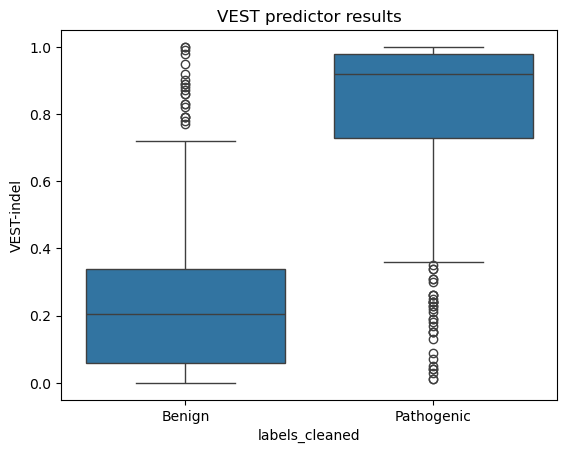

F1 score Combined/IndeLLM mean small indels: 0.6963788300835655
F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score VEST small indels: 0.8721649484536083
Accuracy score Combined/IndeLLM mean small indels: 0.6955307262569832
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score VEST small indels: 0.8799612778315585
MCC Combined/IndeLLM mean small indels: 0.3961707161905172
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC VEST small indels: 0.7611801718993607


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

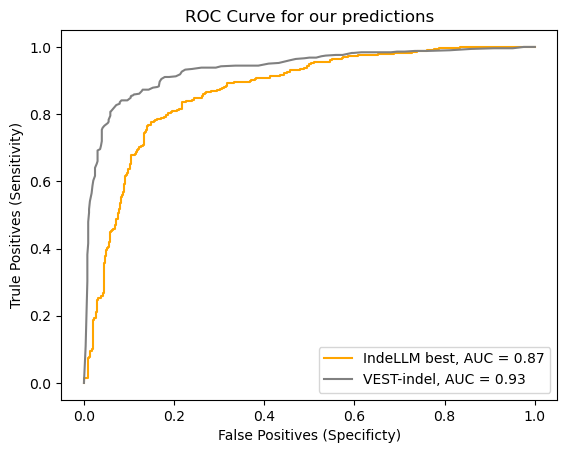

In [57]:
#Some of the columns in VEST contain no prediction, so filer the dataset
filtered_VEST = keptlabels.dropna(subset=['VEST-indel'])
pred_VEST = filtered_VEST['VEST-indel'].values
truelabels_VEST = filtered_VEST['labels_binary'].values

filtered_VEST.describe()

#Boxplot of VEST
plt.title('VEST predictor results')
sns.boxplot(x = filtered_VEST['labels_cleaned'], y = filtered_VEST['VEST-indel'])
plt.show()

#The VEST predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_VEST -= 1
truelabels_VEST = np.abs(truelabels_VEST) 

#Calculating FP, TN and thresholds
fpr_VEST, tpr_VEST, thersholds_VEST = metrics.roc_curve(truelabels_VEST, pred_VEST)
roc_auc_VEST = round(metrics.auc(fpr_VEST, tpr_VEST), 2)

#Calculating F1 score
tresh_VEST = thersholds_VEST[np.argmax(tpr_VEST - fpr_VEST)]
pred_VEST_bin = [1 if x >= tresh_VEST else 0 for x in pred_VEST]
f1_VEST = f1_score(truelabels_VEST, pred_VEST_bin, average = 'binary')

#Calculating accuary score
accuracy_VEST = accuracy_score(truelabels_VEST, pred_VEST_bin)

#Calculating MCC
mcc_VEST = matthews_corrcoef(truelabels_VEST, pred_VEST_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score VEST small indels:", f1_VEST)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score VEST small indels:", accuracy_VEST)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC VEST small indels:", mcc_VEST)

#Plotting the Evo, Fit and VEST AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM best, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_VEST, tpr_VEST, label = "VEST-indel, AUC = "+str(roc_auc_VEST), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()


FATHMM-indel: Ferlaino et al. 2017: https://link.springer.com/article/10.1186/s12859-017-1862-y

We developed a machine learning approach to classify the functional effects of small indels, that is, variants where the sequence change involves up to 20 base pairs. 
An integrative approach to predict the functional effect, pathogenic or neutral, of indels in non-coding regions of the human genome. Our method exploits various genomic annotations in addition to sequence data. When validated on benchmark data, FATHMM-indel significantly outperforms CADD and GAVIN, state of the art models in assessing the pathogenic impact of non-coding variants. FATHMM-indel is available via a web server at indels.biocompute.org.uk.

From methods: Pathogenic non–coding indels were collected from the CinVar database.

/tmp/ipykernel_3388504/1425138345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['FATHMM-indel'] = pd.to_numeric(keptlabels['FATHMM-indel'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1061.000000,1061.000000,1061.000000,685.000000,0.0,1.061000e+03,1.061000e+03,1061.000000,1061.000000,1061.000000,1047.000000,984.000000,1023.000000,1061.000000,1061.000000
mean,1908.747408,1975.892554,170.548539,172.747445,NaN,7.150763e+07,7.150764e+07,15.743933,0.304125,0.532796,0.475178,-6.717988,0.522444,63.501414,0.525919
std,1061.058900,1102.244631,116.424576,117.802971,NaN,5.935627e+07,5.935627e+07,5.814225,0.376533,0.424523,0.217974,8.302230,0.362804,40.784607,0.499563
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000004,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1076.000000,1110.000000,69.000000,69.000000,NaN,2.512372e+07,2.512372e+07,12.720000,0.003992,0.043144,0.281370,-11.570000,0.170000,12.000000,0.000000
50%,1879.000000,1938.000000,159.000000,157.000000,NaN,5.413964e+07,5.413965e+07,17.260000,0.064607,0.663796,0.483370,-3.775000,0.470000,89.000000,1.000000
75%,2752.000000,2848.000000,249.000000,253.000000,NaN,1.091415e+08,1.091415e+08,20.300000,0.637463,0.968959,0.628475,-0.442500,0.920000,97.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'FATHMM predictor results')

<Axes: title={'center': 'FATHMM predictor results'}, xlabel='labels_cleaned', ylabel='FATHMM-indel'>

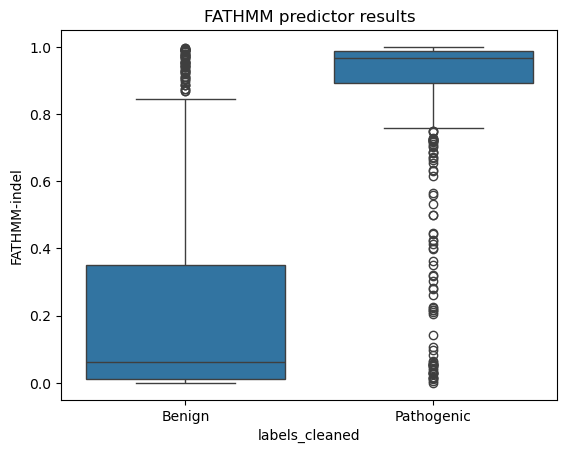

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score FATHMM small indels: 0.8643410852713178
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score FATHMM small indels: 0.8680490103675778
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC FATHMM small indels: 0.7369452033213092


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

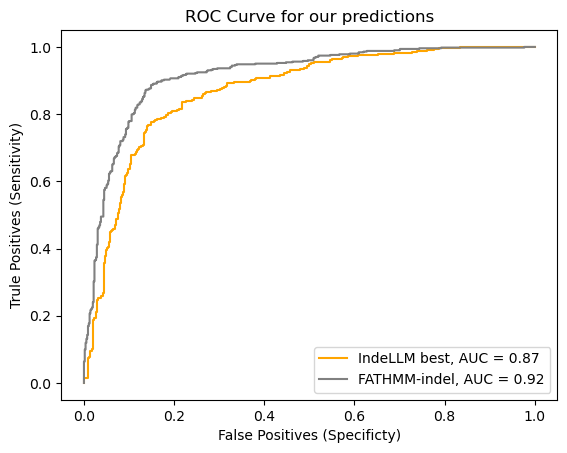

In [58]:
#Some of the columns in FATHMM contain no prediction, so filer the dataset
keptlabels['FATHMM-indel'] = pd.to_numeric(keptlabels['FATHMM-indel'], errors='coerce')
filtered_FATHMM = keptlabels.dropna(subset=['FATHMM-indel'])
pred_FATHMM = filtered_FATHMM['FATHMM-indel'].values
truelabels_FATHMM = filtered_FATHMM['labels_binary'].values

filtered_FATHMM.describe()

#Boxplot of FATHMM
plt.title('FATHMM predictor results')
sns.boxplot(x = filtered_FATHMM['labels_cleaned'], y = filtered_FATHMM['FATHMM-indel'])
plt.show()

#The FATHMM predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_FATHMM -= 1
truelabels_FATHMM = np.abs(truelabels_FATHMM) 

#Calculating FP, TN and thresholds
fpr_FATHMM, tpr_FATHMM, thersholds_FATHMM = metrics.roc_curve(truelabels_FATHMM, pred_FATHMM)
roc_auc_FATHMM = round(metrics.auc(fpr_FATHMM, tpr_FATHMM), 2)

#Calculating F1 score
tresh_FATHMM = thersholds_FATHMM[np.argmax(tpr_FATHMM - fpr_FATHMM)]
pred_FATHMM_bin = [1 if x >= tresh_FATHMM else 0 for x in pred_FATHMM]
f1_FATHMM = f1_score(truelabels_FATHMM, pred_FATHMM_bin, average = 'binary')

#Calculating accuary score
accuracy_FATHMM = accuracy_score(truelabels_FATHMM, pred_FATHMM_bin)

#Calculating MCC
mcc_FATHMM = matthews_corrcoef(truelabels_FATHMM, pred_FATHMM_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score FATHMM small indels:", f1_FATHMM)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score FATHMM small indels:", accuracy_FATHMM)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC FATHMM small indels:", mcc_FATHMM)

#Plotting the Evo, Fit and FATHMM AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM best, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_FATHMM, tpr_FATHMM, label = "FATHMM-indel, AUC = "+str(roc_auc_FATHMM), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()


CADD: Rentzsch et al. 2021 https://link.springer.com/article/10.1186/s13073-021-00835-9

Method: 
The MFASS [26] data set was downloaded from GitHub (https://github.com/KosuriLab/MFASS/). The data set was split into intronic (n = 13,603) and exonic (n = 14,130) variants as defined by Cheung et al. [26]. Further, the data set was split into splice-disrupting variants (sdv, n = 1050) and variants that do not disrupt splicing (no-sdv, n = 26,683) based on whether the psi ratio of the tested exon changed by more than 0.5 (Δpsi > 0.5). 

/tmp/ipykernel_3388504/839811326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['CADD'] = pd.to_numeric(keptlabels['CADD'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1073.000000,1073.000000,1073.000000,692.000000,0.0,1.073000e+03,1.073000e+03,1073.000000,1071.000000,1061.000000,1059.000000,986.000000,1032.000000,1071.000000,1073.000000
mean,1913.104380,1980.388630,169.640261,171.531792,NaN,7.114532e+07,7.114533e+07,15.745684,0.301437,0.532796,0.475077,-6.707495,0.519932,63.654528,0.531221
std,1058.753802,1099.826556,116.737416,118.273484,NaN,5.925480e+07,5.925480e+07,5.792186,0.375809,0.424523,0.217343,8.297104,0.362447,40.671791,0.499257
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000004,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1083.000000,1117.000000,68.000000,68.000000,NaN,2.332149e+07,2.332149e+07,12.750000,0.003879,0.043144,0.282345,-11.562500,0.170000,12.000000,0.000000
50%,1883.000000,1942.000000,158.000000,156.000000,NaN,5.393895e+07,5.393895e+07,17.260000,0.061002,0.663796,0.484880,-3.755000,0.460000,89.000000,1.000000
75%,2749.000000,2845.000000,248.000000,252.250000,NaN,1.086237e+08,1.086237e+08,20.300000,0.633079,0.968959,0.626850,-0.450000,0.920000,97.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'CADD predictor results')

<Axes: title={'center': 'CADD predictor results'}, xlabel='labels_cleaned', ylabel='CADD'>

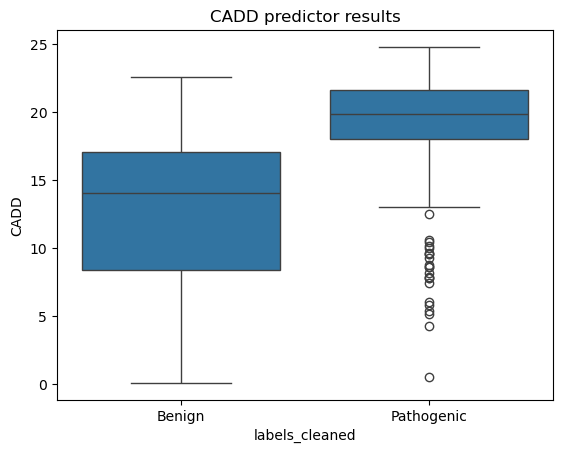

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score CADD small indels: 0.7852998065764023
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score CADD small indels: 0.7931034482758621
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC CADD small indels: 0.5867425030729375


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

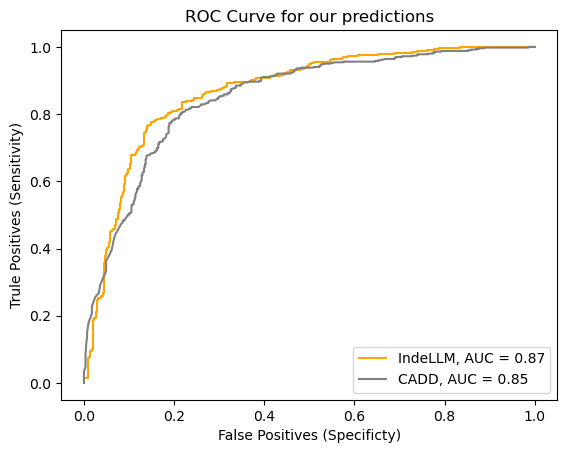

In [59]:
#Some of the columns in CADD contain no prediction, so filer the dataset
keptlabels['CADD'] = pd.to_numeric(keptlabels['CADD'], errors='coerce')
filtered_CADD = keptlabels.dropna(subset=['CADD'])
pred_CADD = filtered_CADD['CADD'].values
truelabels_CADD = filtered_CADD['labels_binary'].values

filtered_CADD.describe()

#Boxplot of CADD
plt.title('CADD predictor results')
sns.boxplot(x = filtered_CADD['labels_cleaned'], y = filtered_CADD['CADD'])
plt.show()

#The CADD predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_CADD -= 1
truelabels_CADD = np.abs(truelabels_CADD) 

#Calculating FP, TN and thresholds
fpr_CADD, tpr_CADD, thersholds_CADD = metrics.roc_curve(truelabels_CADD, pred_CADD)
roc_auc_CADD = round(metrics.auc(fpr_CADD, tpr_CADD), 2)

#Calculating F1 score
tresh_CADD = thersholds_CADD[np.argmax(tpr_CADD - fpr_CADD)]
pred_CADD_bin = [1 if x >= tresh_CADD else 0 for x in pred_CADD]
f1_CADD = f1_score(truelabels_CADD, pred_CADD_bin, average = 'binary')

#Calculating accuary score
accuracy_CADD = accuracy_score(truelabels_CADD, pred_CADD_bin)

#Calculating MCC
mcc_CADD = matthews_corrcoef(truelabels_CADD, pred_CADD_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score CADD small indels:", f1_CADD)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score CADD small indels:", accuracy_CADD)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC CADD small indels:", mcc_CADD)

#Plotting the Evo, Fit and CADD AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_CADD, tpr_CADD, label = "CADD, AUC = "+str(roc_auc_CADD), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()


CAPICE: Li et al. 2020 https://link.springer.com/article/10.1186/s13073-020-00775-w

A new machine-learning-based method for prioritizing pathogenic variants, including SNVs and short InDels.

Training and benchmark data on neutral and pathogenic variants were derived from vcf files from the ClinVar database [17], dated 02 January 2019; from the VKGL data share consortium [30]; from the GoNL data [31]; and from data used in a previous study [29]. From the ClinVar dataset, we collected variants reported by one or more submitters to have clear clinical significance, including pathogenic and likely pathogenic variants and neutral and likely neutral variants. From the VKGL data consortium, we collected variants with clear classifications, either (Likely) Pathogenic or (Likely) Benign, with support from one or more laboratories. The neutral variants from previous research developing the GAVIN tool [29] were mainly collected from ExAC without posing a constraint on allele frequency. We also obtained two neutral benchmark datasets from a benchmark study by [24] and the GoNL project.

/tmp/ipykernel_3388504/349737421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['CAPICE'] = pd.to_numeric(keptlabels['CAPICE'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1072.000000,1072.000000,1072.000000,692.000000,0.0,1.072000e+03,1.072000e+03,1071.000000,1072.000000,1061.000000,1058.000000,986.000000,1032.000000,1072.000000,1072.000000
mean,1914.624067,1981.957090,169.611007,171.521676,NaN,7.118770e+07,7.118771e+07,15.750270,0.301156,0.532796,0.475112,-6.707495,0.520184,63.686567,0.530784
std,1058.228822,1099.291735,116.783970,118.262436,NaN,5.926170e+07,5.926170e+07,5.796449,0.375747,0.424523,0.217344,8.297104,0.362189,40.666330,0.499284
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000004,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1083.750000,1117.750000,68.000000,68.000000,NaN,2.360228e+07,2.360228e+07,12.750000,0.003857,0.043144,0.282197,-11.562500,0.177500,12.000000,0.000000
50%,1883.500000,1942.500000,158.000000,156.000000,NaN,5.403072e+07,5.403073e+07,17.260000,0.060856,0.663796,0.484790,-3.755000,0.460000,89.500000,1.000000
75%,2749.500000,2845.500000,248.250000,252.250000,NaN,1.086237e+08,1.086237e+08,20.300000,0.632291,0.968959,0.626895,-0.450000,0.920000,97.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'CAPICE predictor results')

<Axes: title={'center': 'CAPICE predictor results'}, xlabel='labels_cleaned', ylabel='CAPICE'>

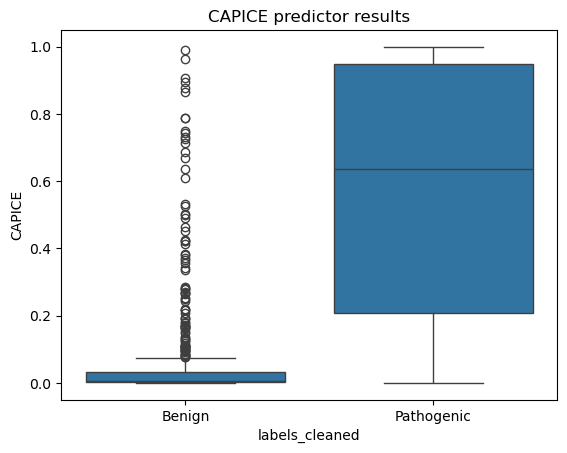

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score CAPICE small indels: 0.8413926499032882
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score CAPICE small indels: 0.8470149253731343
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC CAPICE small indels: 0.6948037863745002


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

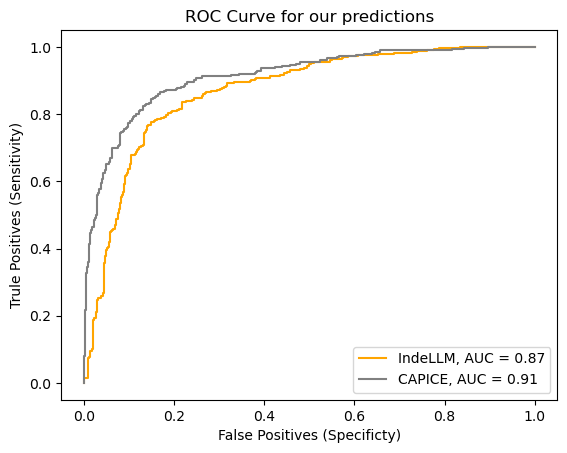

In [60]:
#Some of the columns in CAPICE contain no prediction, so filer the dataset
keptlabels['CAPICE'] = pd.to_numeric(keptlabels['CAPICE'], errors='coerce')
filtered_CAPICE = keptlabels.dropna(subset=['CAPICE'])
pred_CAPICE = filtered_CAPICE['CAPICE'].values
truelabels_CAPICE = filtered_CAPICE['labels_binary'].values

filtered_CAPICE.describe()

#Boxplot of CAPICE
plt.title('CAPICE predictor results')
sns.boxplot(x = filtered_CAPICE['labels_cleaned'], y = filtered_CAPICE['CAPICE'])
plt.show()

#The CAPICE predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_CAPICE -= 1
truelabels_CAPICE = np.abs(truelabels_CAPICE) 

#Calculating FP, TN and thresholds
fpr_CAPICE, tpr_CAPICE, thersholds_CAPICE = metrics.roc_curve(truelabels_CAPICE, pred_CAPICE)
roc_auc_CAPICE = round(metrics.auc(fpr_CAPICE, tpr_CAPICE), 2)

#Calculating F1 score
tresh_CAPICE = thersholds_CAPICE[np.argmax(tpr_CAPICE - fpr_CAPICE)]
pred_CAPICE_bin = [1 if x >= tresh_CAPICE else 0 for x in pred_CAPICE]
f1_CAPICE = f1_score(truelabels_CAPICE, pred_CAPICE_bin, average = 'binary')

#Calculating accuary score
accuracy_CAPICE = accuracy_score(truelabels_CAPICE, pred_CAPICE_bin)

#Calculating MCC
mcc_CAPICE = matthews_corrcoef(truelabels_CAPICE, pred_CAPICE_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score CAPICE small indels:", f1_CAPICE)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score CAPICE small indels:", accuracy_CAPICE)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC CAPICE small indels:", mcc_CAPICE)

#Plotting the Evo, Fit and CAPICE AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_CAPICE, tpr_CAPICE, label = "CAPICE, AUC = "+str(roc_auc_CAPICE), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

PROVEAN Choi et al. 2012: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0046688

We have developed a new algorithm, PROVEAN (Protein Variation Effect Analyzer), which provides a generalized approach to predict the functional effects of protein sequence variations including single or multiple amino acid substitutions, and in-frame insertions and deletions. In any protein sequence (!)

The UniProt human protein variation dataset used in this study contains a single amino acid substitution dataset and a one to six amino acid in-frame indel dataset. The human single amino acid substitution dataset was obtained from the UniProt “Human Polymorphisms and Disease Mutations” dataset (Release 2011_09; http://www.uniprot.org/docs/humsavar), which contains 20,821 pre-annotated disease variants and 36,825 common polymorphisms. The human small in-frame indel dataset was built in-house from additional types of natural variations including deletions, insertions, and replacements (in-frame substitution of multiple amino acids) of length up to 6 amino acids from the UniProtKB/Swiss-Prot database (Dataset S1).

Testet for our deletion (bbarrel 3aa del), predicted as deleterious (-9.221 score, threshold -2.5)
![alt text](image.png)

/tmp/ipykernel_3388504/1851364786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['PROVEAN'] = pd.to_numeric(keptlabels['PROVEAN'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,986.000000,986.000000,986.000000,624.000000,0.0,9.860000e+02,9.860000e+02,986.000000,986.000000,984.000000,979.000000,986.000000,976.000000,986.000000,986.000000
mean,1925.353955,1993.058824,172.740365,176.604167,NaN,7.030164e+07,7.030165e+07,15.840909,0.307358,0.535987,0.481599,-6.707495,0.516977,64.689655,0.523327
std,1058.980286,1100.184178,115.328969,117.608372,NaN,5.776159e+07,5.776159e+07,5.727645,0.376762,0.424254,0.216662,8.297104,0.362851,40.314034,0.499709
min,0.000000,0.000000,1.000000,2.000000,NaN,4.744600e+04,4.745500e+04,0.072000,0.000005,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1094.000000,1128.000000,72.250000,74.750000,NaN,2.520981e+07,2.520982e+07,12.810000,0.004466,0.043921,0.292325,-11.562500,0.170000,13.000000,0.000000
50%,1883.500000,1942.500000,163.000000,164.000000,NaN,5.200927e+07,5.200928e+07,17.385000,0.071280,0.686459,0.489930,-3.755000,0.460000,90.000000,1.000000
75%,2751.750000,2847.750000,249.750000,254.250000,NaN,1.071139e+08,1.071139e+08,20.375000,0.636908,0.968606,0.636360,-0.450000,0.920000,97.000000,1.000000
max,3811.000000,3955.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'PROVEAN predictor results')

<Axes: title={'center': 'PROVEAN predictor results'}, xlabel='labels_cleaned', ylabel='PROVEAN'>

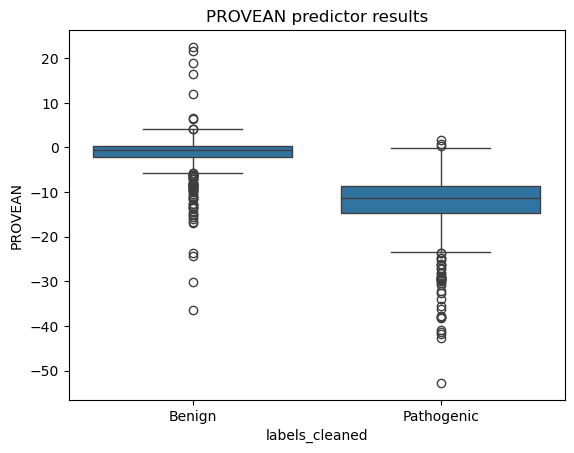

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score PROVEAN small indels: 0.8890977443609023
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score PROVEAN small indels: 0.8803245436105477
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC PROVEAN small indels: 0.7610185033932599


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

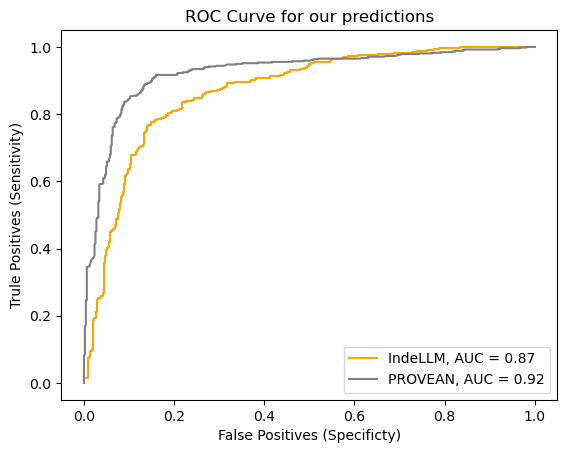

In [61]:
#Some of the columns in PROVEAN contain no prediction, so filer the dataset
keptlabels['PROVEAN'] = pd.to_numeric(keptlabels['PROVEAN'], errors='coerce')
filtered_PROVEAN = keptlabels.dropna(subset=['PROVEAN'])
pred_PROVEAN = filtered_PROVEAN['PROVEAN'].values
truelabels_PROVEAN = filtered_PROVEAN['labels_binary'].values

filtered_PROVEAN.describe()

#Boxplot of PROVEAN
plt.title('PROVEAN predictor results')
sns.boxplot(x = filtered_PROVEAN['labels_cleaned'], y = filtered_PROVEAN['PROVEAN'])
plt.show()

#Calculating FP, TN and thresholds
fpr_PROVEAN, tpr_PROVEAN, thersholds_PROVEAN = metrics.roc_curve(truelabels_PROVEAN, pred_PROVEAN)
roc_auc_PROVEAN = round(metrics.auc(fpr_PROVEAN, tpr_PROVEAN), 2)

#Calculating F1 score
tresh_PROVEAN = thersholds_PROVEAN[np.argmax(tpr_PROVEAN - fpr_PROVEAN)]
pred_PROVEAN_bin = [1 if x >= tresh_PROVEAN else 0 for x in pred_PROVEAN]
f1_PROVEAN = f1_score(truelabels_PROVEAN, pred_PROVEAN_bin, average = 'binary')

#Calculating accuary score
accuracy_PROVEAN = accuracy_score(truelabels_PROVEAN, pred_PROVEAN_bin)

#Calculating MCC
mcc_PROVEAN = matthews_corrcoef(truelabels_PROVEAN, pred_PROVEAN_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score PROVEAN small indels:", f1_PROVEAN)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score PROVEAN small indels:", accuracy_PROVEAN)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC PROVEAN small indels:", mcc_PROVEAN)

#Plotting the Evo, Fit and PROVEAN AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_PROVEAN, tpr_PROVEAN, label = "PROVEAN, AUC = "+str(roc_auc_PROVEAN), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

MutationTaster2021 Steinhaus et al. 2021: https://academic.oup.com/nar/article/49/W1/W446/6249609

Here we present an update to MutationTaster, our DNA variant effect prediction tool. The new version uses a different prediction model and attains higher accuracy than its predecessor, especially for rare benign variants. In addition, we have integrated many sources of data that only became available after the last release (such as gnomAD and ExAC pLI scores) and changed the splice site prediction model. To more easily assess the relevance of detected known disease mutations to the clinical phenotype of the patient, MutationTaster now provides information on the diseases they cause.


/tmp/ipykernel_3388504/1561690791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_MutationTaster2021['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in filtered_MutationTaster2021['MutationTaster2021']]


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary,MutationTaster2021_bin
count,1012.000000,1012.000000,1012.000000,654.000000,0.0,1.012000e+03,1.012000e+03,1011.000000,1012.000000,1003.000000,1010.000000,966.000000,1011.000000,1012.000000,1012.000000,1012.000000
mean,1928.289526,1996.105731,172.438735,174.802752,NaN,6.952241e+07,6.952242e+07,16.056854,0.315346,0.551048,0.483129,-6.799400,0.523739,65.833004,0.509881,0.494071
std,1056.473360,1097.557247,116.223723,117.969417,NaN,5.736433e+07,5.736433e+07,5.601791,0.379774,0.423444,0.215699,8.339684,0.362023,39.902413,0.500150,0.500212
min,0.000000,0.000000,1.000000,2.000000,NaN,4.744600e+04,4.745500e+04,0.072000,0.000005,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000,0.000000
25%,1106.750000,1140.750000,70.000000,72.250000,NaN,2.332148e+07,2.332148e+07,13.295000,0.004946,0.049219,0.301605,-11.597500,0.180000,15.000000,0.000000,0.000000
50%,1888.500000,1947.500000,162.500000,163.000000,NaN,5.061313e+07,5.061313e+07,17.650000,0.080813,0.723876,0.493750,-4.120000,0.470000,90.000000,1.000000,0.000000
75%,2757.250000,2853.250000,251.000000,254.000000,NaN,1.039035e+08,1.039035e+08,20.450000,0.696255,0.971148,0.635463,-0.467500,0.920000,98.000000,1.000000,1.000000
max,3813.000000,3957.000000,490.000000,479.000000,NaN,2.484735e+08,2.484735e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000,1.000000


Text(0.5, 1.0, 'MutationTaster2021 predictor results')

<Axes: title={'center': 'MutationTaster2021 predictor results'}, xlabel='labels_cleaned', ylabel='MutationTaster2021_bin'>

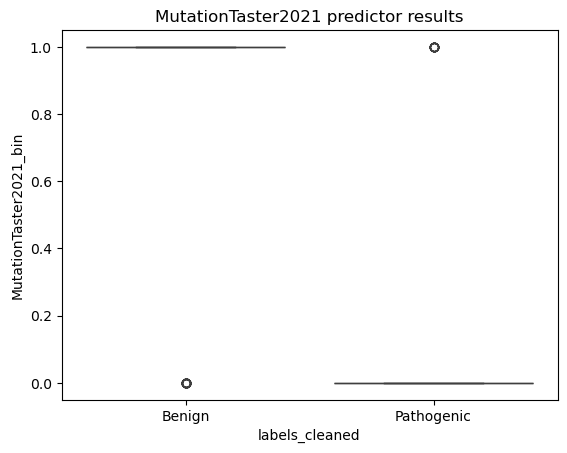

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score MutationTaster2021 small indels: 0.9625984251968503
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score MutationTaster2021 small indels: 0.9624505928853755
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC MutationTaster2021 small indels: 0.925381304893557


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

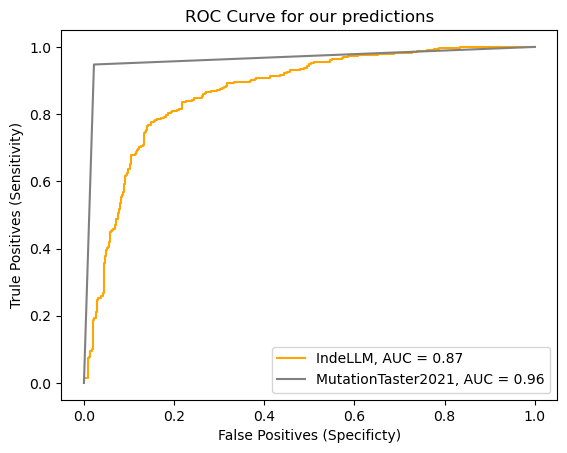

In [62]:
#Some of the columns in MutationTaster2021 contain no prediction, so filter the dataset
filtered_MutationTaster2021 = keptlabels.dropna(subset=['MutationTaster2021'])

filtered_MutationTaster2021['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in filtered_MutationTaster2021['MutationTaster2021']]
pred_MutationTaster2021 = filtered_MutationTaster2021['MutationTaster2021_bin'].values
truelabels_MutationTaster2021 = filtered_MutationTaster2021['labels_binary'].values

filtered_MutationTaster2021.describe()

#Boxplot of MutationTaster2021
plt.title('MutationTaster2021 predictor results')
sns.boxplot(x = filtered_MutationTaster2021['labels_cleaned'], y = filtered_MutationTaster2021['MutationTaster2021_bin'])
plt.show()

#Calculating FP, TN and thresholds
fpr_MutationTaster2021, tpr_MutationTaster2021, thersholds_MutationTaster2021 = metrics.roc_curve(truelabels_MutationTaster2021, pred_MutationTaster2021)
roc_auc_MutationTaster2021 = round(metrics.auc(fpr_MutationTaster2021, tpr_MutationTaster2021), 2)

#Calculating F1 score
tresh_MutationTaster2021 = thersholds_MutationTaster2021[np.argmax(tpr_MutationTaster2021 - fpr_MutationTaster2021)]
f1_MutationTaster2021 = f1_score(truelabels_MutationTaster2021, pred_MutationTaster2021, average = 'binary')

#Calculating accuary score
accuracy_MutationTaster2021 = accuracy_score(truelabels_MutationTaster2021, pred_MutationTaster2021)

#Calculating MCC
mcc_MutationTaster2021 = matthews_corrcoef(truelabels_MutationTaster2021, pred_MutationTaster2021)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score MutationTaster2021 small indels:", f1_MutationTaster2021)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score MutationTaster2021 small indels:", accuracy_MutationTaster2021)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC MutationTaster2021 small indels:", mcc_MutationTaster2021)

#Plotting the Evo, Fit and MutationTaster2021 AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_MutationTaster2021, tpr_MutationTaster2021, label = "MutationTaster2021, AUC = "+str(roc_auc_MutationTaster2021), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

MutPred-Indel Pagel et al. 2019: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007112

We present a machine learning method, MutPred-Indel, that predicts pathogenicity and identifies types of functional residues impacted by non-frameshifting insertion/deletion variation.

Training data sets: Disease causing sequence-retaining insertion, deletion, and complex indel variants were obtained from the Human Gene Mutation Database (HGMD), professional version 2017.1 [36]. For brevity, we will refer to the set of non-frameshifting insertion, deletion, and complex indel variants collectively as “insertion/deletion variants” or simply “variants” for the remainder of the text. Putatively neutral insertion/deletion variants were derived from the Genome Aggregation Database (gnomAD) [44]. In the process of collecting data, variants from gnomAD with Allele Count (AC) annotation of zero were considered to be of low quality and removed from the training data. Variants annotated within gnomAD with AC equal to one were similarly removed to reduce noise that may arise as a consequence of variants called in error. For each variant, the wild-type and mutant protein sequence were determined using ANNOVAR [45]. The number of variants considered in model training are described in Table 2. In total, the training data comprised 5606 single residue deletions, 1033 single residue insertions, 2427 multi-residue insertions, 3052 multi-residue deletions, and 1253 complex indel variants.

/tmp/ipykernel_3388504/2112723025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['MutPredIndel'] = pd.to_numeric(keptlabels['MutPredIndel'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1060.000000,1060.000000,1060.000000,685.000000,0.0,1.060000e+03,1.060000e+03,1059.000000,1058.000000,1047.000000,1060.000000,979.000000,1031.000000,1058.000000,1060.000000
mean,1907.721698,1974.751887,170.411321,172.232117,NaN,7.136653e+07,7.136654e+07,15.830136,0.303967,0.536115,0.474821,-6.742686,0.518836,64.299622,0.527358
std,1057.687126,1098.711260,116.877363,118.453485,NaN,5.939905e+07,5.939905e+07,5.702000,0.376342,0.424412,0.217401,8.308212,0.362164,40.433835,0.499487
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000005,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1082.750000,1116.750000,68.000000,68.000000,NaN,2.332149e+07,2.332149e+07,12.895000,0.004088,0.044811,0.281710,-11.570000,0.170000,12.250000,0.000000
50%,1879.500000,1938.500000,159.000000,157.000000,NaN,5.412524e+07,5.412524e+07,17.280000,0.064610,0.685849,0.484790,-3.820000,0.460000,90.000000,1.000000
75%,2740.250000,2836.250000,250.000000,254.000000,NaN,1.087533e+08,1.087533e+08,20.300000,0.636908,0.969480,0.626805,-0.460000,0.920000,97.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'MutPredIndel predictor results')

<Axes: title={'center': 'MutPredIndel predictor results'}, xlabel='labels_cleaned', ylabel='MutPredIndel'>

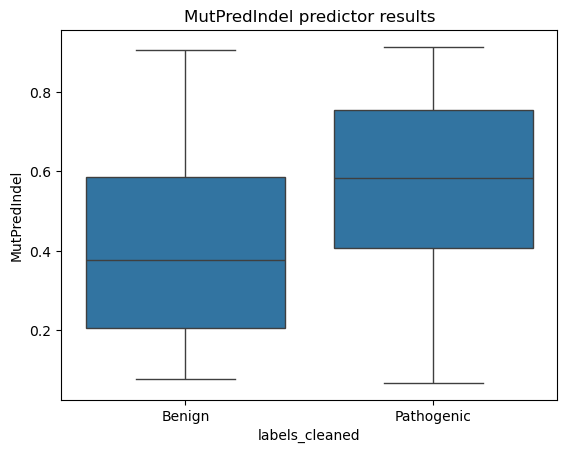

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score MutPredIndel small indels: 0.5842985842985843
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score MutPredIndel small indels: 0.6952830188679245
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC MutPredIndel small indels: 0.41574309767277856


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

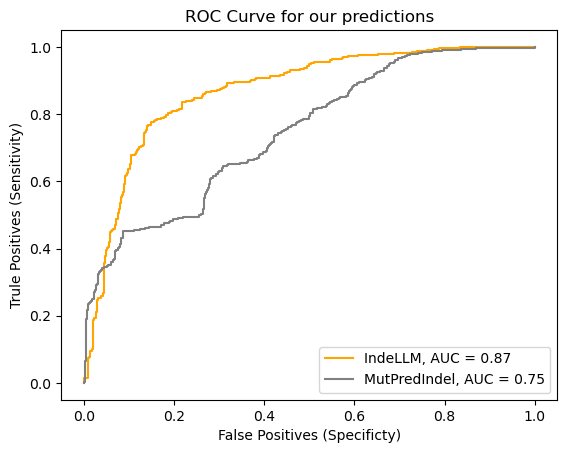

In [63]:
#Some of the columns in MutPredIndel contain no prediction, so filer the dataset
keptlabels['MutPredIndel'] = pd.to_numeric(keptlabels['MutPredIndel'], errors='coerce')
filtered_MutPredIndel = keptlabels.dropna(subset=['MutPredIndel'])
pred_MutPredIndel = filtered_MutPredIndel['MutPredIndel'].values
truelabels_MutPredIndel = filtered_MutPredIndel['labels_binary'].values

filtered_MutPredIndel.describe()

#Boxplot of MutPredIndel
plt.title('MutPredIndel predictor results')
sns.boxplot(x = filtered_MutPredIndel['labels_cleaned'], y = filtered_MutPredIndel['MutPredIndel'])
plt.show()

#The MutPredIndel predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_MutPredIndel -= 1
truelabels_MutPredIndel = np.abs(truelabels_MutPredIndel) 

#Calculating FP, TN and thresholds
fpr_MutPredIndel, tpr_MutPredIndel, thersholds_MutPredIndel = metrics.roc_curve(truelabels_MutPredIndel, pred_MutPredIndel)
roc_auc_MutPredIndel = round(metrics.auc(fpr_MutPredIndel, tpr_MutPredIndel), 2)

#Calculating F1 score
tresh_MutPredIndel = thersholds_MutPredIndel[np.argmax(tpr_MutPredIndel - fpr_MutPredIndel)]
pred_MutPredIndel_bin = [1 if x >= tresh_MutPredIndel else 0 for x in pred_MutPredIndel]
f1_MutPredIndel = f1_score(truelabels_MutPredIndel, pred_MutPredIndel_bin, average = 'binary')

#Calculating accuary score
accuracy_MutPredIndel = accuracy_score(truelabels_MutPredIndel, pred_MutPredIndel_bin)

#Calculating MCC
mcc_MutPredIndel = matthews_corrcoef(truelabels_MutPredIndel, pred_MutPredIndel_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score MutPredIndel small indels:", f1_MutPredIndel)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score MutPredIndel small indels:", accuracy_MutPredIndel)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC MutPredIndel small indels:", mcc_MutPredIndel)

#Plotting the Evo, Fit and MutPredIndel AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_MutPredIndel, tpr_MutPredIndel, label = "MutPredIndel, AUC = "+str(roc_auc_MutPredIndel), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()


SIFT Indel: Hu et al. 2013 https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0077940

We construct a SIFT Indel prediction algorithm for 3n indels which achieves 82% accuracy, 81% sensitivity, 82% specificity, 82% precision, 0.63 MCC, and 0.87 AUC by 10-fold cross-validation.

The goal of this classifier is to predict if a 3n indel affects gene function (designated as “gene-damaging") or not (designated as “neutral”). The classifier for 3n indels was trained and tested on two datasets:

1. Indel Disease Set: Disease-causing indels were obtained from HGMD [2] version 2010.2. HGMD is a database of mutations found in affected patients, and these mutations are assumed to be gene-damaging. The original HGMD dataset contains 1,887 indels. We picked one indel per gene to be represented in the dataset to avoid over-training on genes that have many HGMD indel entries. After choosing one indel per gene and removing indels from non-exon regions and from genes with invalid/incomplete transcripts, 474 indels remained. The HGMD accession id’s of the 1,887 indels and 474 indels can be found in Data S1.
2. Neutral Indel Set: The set of neutral 3n indels were derived from pairwise alignments from the UCSC genome browser of human with cow, dog, horse, chimpanzee, rhesus macaque and rat [14]. After choosing one indel per gene and removing indels from non-exon regions and from genes with invalid/incomplete transcripts, there were 9,710 neutral indels. The locations of the neutral indels can be found in Data S1.

/tmp/ipykernel_3388504/4204821437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_SIFT['SIFT-indel_bin'] = [ 1 if x == 'neutral' else 0 for x in filtered_SIFT['SIFT-indel']]


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary,SIFT-indel_bin
count,1026.000000,1026.000000,1026.000000,662.000000,0.0,1.026000e+03,1.026000e+03,1025.000000,1025.000000,1014.000000,1024.000000,969.000000,1023.000000,1025.000000,1026.000000,1026.000000
mean,1934.279727,2002.340156,173.053606,174.895770,NaN,6.918293e+07,6.918293e+07,16.035440,0.314636,0.551179,0.482661,-6.778070,0.523255,65.950244,0.509747,0.379142
std,1057.620836,1098.722297,116.321120,117.944779,NaN,5.676472e+07,5.676472e+07,5.612236,0.378803,0.423687,0.215998,8.330136,0.362185,39.846930,0.500149,0.485410
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.147000,0.000007,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000,0.000000
25%,1106.250000,1140.250000,70.000000,70.250000,NaN,2.332149e+07,2.332149e+07,13.270000,0.005044,0.049192,0.300635,-11.590000,0.180000,15.000000,0.000000,0.000000
50%,1891.500000,1950.500000,163.000000,163.000000,NaN,5.113542e+07,5.113542e+07,17.620000,0.082467,0.724001,0.493750,-4.110000,0.470000,90.000000,1.000000,0.000000
75%,2756.500000,2852.500000,251.750000,255.750000,NaN,1.032434e+08,1.032434e+08,20.400000,0.688662,0.971290,0.636155,-0.490000,0.920000,98.000000,1.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.480228e+08,2.480228e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000,1.000000


Text(0.5, 1.0, 'SIFT predictor results')

<Axes: title={'center': 'SIFT predictor results'}, xlabel='labels_cleaned', ylabel='SIFT-indel_bin'>

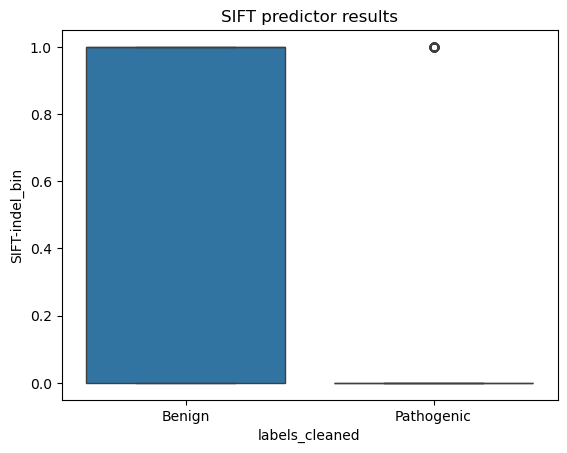

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score SIFT small indels: 0.7083333333333334
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score SIFT small indels: 0.7407407407407407
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC SIFT small indels: 0.5011460719736146


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

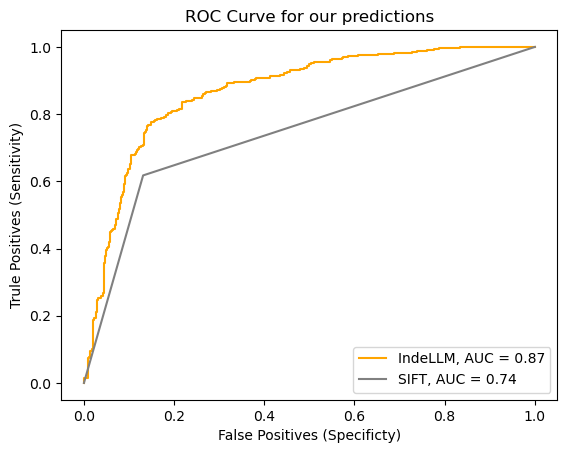

In [64]:
filtered_SIFT = keptlabels.dropna(subset=['SIFT-indel'])
filtered_SIFT['SIFT-indel_bin'] = [ 1 if x == 'neutral' else 0 for x in filtered_SIFT['SIFT-indel']]
pred_SIFT = filtered_SIFT['SIFT-indel_bin'].values
truelabels_SIFT = filtered_SIFT['labels_binary'].values

filtered_SIFT.describe()

#Boxplot of SIFT
plt.title('SIFT predictor results')
sns.boxplot(x = filtered_SIFT['labels_cleaned'], y = filtered_SIFT['SIFT-indel_bin'])
plt.show()

#Calculating FP, TN and thresholds
fpr_SIFT, tpr_SIFT, thersholds_SIFT = metrics.roc_curve(truelabels_SIFT, pred_SIFT)
roc_auc_SIFT = round(metrics.auc(fpr_SIFT, tpr_SIFT), 2)

#Calculating F1 score
tresh_SIFT = thersholds_SIFT[np.argmax(tpr_SIFT - fpr_SIFT)]
f1_SIFT = f1_score(truelabels_SIFT, pred_SIFT, average = 'binary')

#Calculating accuary score
accuracy_SIFT = accuracy_score(truelabels_SIFT, pred_SIFT)

#Calculating MCC
mcc_SIFT = matthews_corrcoef(truelabels_SIFT, pred_SIFT)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score SIFT small indels:", f1_SIFT)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score SIFT small indels:", accuracy_SIFT)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC SIFT small indels:", mcc_SIFT)

#Plotting the Evo, Fit and SIFT AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_SIFT, tpr_SIFT, label = "SIFT, AUC = "+str(roc_auc_SIFT), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

The VAAST Variant Prioritizer (VVP): Flygare et al. 2018 https://link.springer.com/article/10.1186/s12859-018-2056-y

The VAAST [13] Variant Prioritizer (VVP) can assign a prioritization score to any type of sequence variant, located anywhere in the genome. To do so, VVP leverages the same Composite Likelihood Ratio Test (CLRT) used by VAAST [13] and its derivatives, VAAST 2.0 [14] and pVAAST [15]. Whereas those tools use the CLRT to score genes to perform burden-based association testing in case-control and family based analyses [2, 16], VVP reports scores for individual variants, and is designed for very large-scale variant prioritization activities. Run times are a major motivation for the VVP project, which is why VVP is written entirely in C, including the VCF parser. All of these factors combine to allow VVP to score every variant in a typical WGS in less than 5 min using a computer with just 4 cpus and 16 GB of RAM.

/tmp/ipykernel_3388504/1843351521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keptlabels['VVP'] = pd.to_numeric(keptlabels['VVP'], errors='coerce')


,Unnamed: 0,Id_matching,Protein_start,Protein_stop,Unnamed: 0_y,start-b38,stop-b38,CADD,CAPICE,FATHMM-indel,MutPredIndel,PROVEAN,VEST-indel,VVP,labels_binary
count,1072.000000,1072.000000,1072.000000,692.000000,0.0,1.072000e+03,1.072000e+03,1071.000000,1072.000000,1061.000000,1058.000000,986.000000,1032.000000,1072.000000,1072.000000
mean,1914.624067,1981.957090,169.611007,171.521676,NaN,7.118770e+07,7.118771e+07,15.750270,0.301156,0.532796,0.475112,-6.707495,0.520184,63.686567,0.530784
std,1058.228822,1099.291735,116.783970,118.262436,NaN,5.926170e+07,5.926170e+07,5.796449,0.375747,0.424523,0.217344,8.297104,0.362189,40.666330,0.499284
min,0.000000,0.000000,1.000000,2.000000,NaN,1.685300e+04,1.685400e+04,0.072000,0.000004,0.000034,0.067692,-52.720000,0.000000,0.000000,0.000000
25%,1083.750000,1117.750000,68.000000,68.000000,NaN,2.360228e+07,2.360228e+07,12.750000,0.003857,0.043144,0.282197,-11.562500,0.177500,12.000000,0.000000
50%,1883.500000,1942.500000,158.000000,156.000000,NaN,5.403072e+07,5.403073e+07,17.260000,0.060856,0.663796,0.484790,-3.755000,0.460000,89.500000,1.000000
75%,2749.500000,2845.500000,248.250000,252.250000,NaN,1.086237e+08,1.086237e+08,20.300000,0.632291,0.968959,0.626895,-0.450000,0.920000,97.000000,1.000000
max,3814.000000,3958.000000,490.000000,479.000000,NaN,2.485746e+08,2.485746e+08,24.800000,0.999197,0.999995,0.913410,22.510000,1.000000,100.000000,1.000000


Text(0.5, 1.0, 'VVP predictor results')

<Axes: title={'center': 'VVP predictor results'}, xlabel='labels_cleaned', ylabel='VVP'>

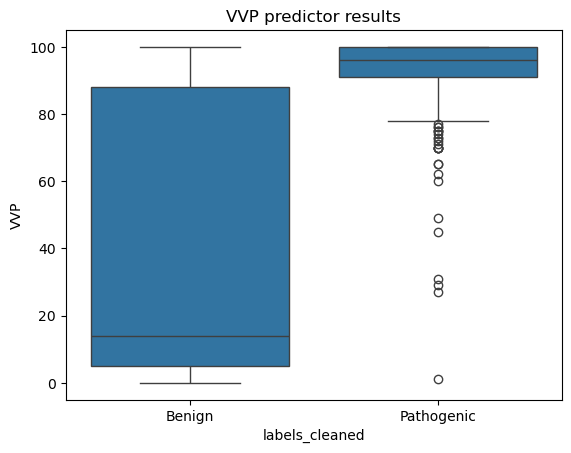

F1 score Combined/IndeLLM best small indels: 0.8146788990825689
F1 score VVP small indels: 0.8413793103448276
Accuracy score Combined/IndeLLM best small indels: 0.8119180633147114
Accuracy score VVP small indels: 0.8283582089552238
MCC Combined/IndeLLM best small indels: 0.6275695037463944
MCC VVP small indels: 0.6896932378723686


Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

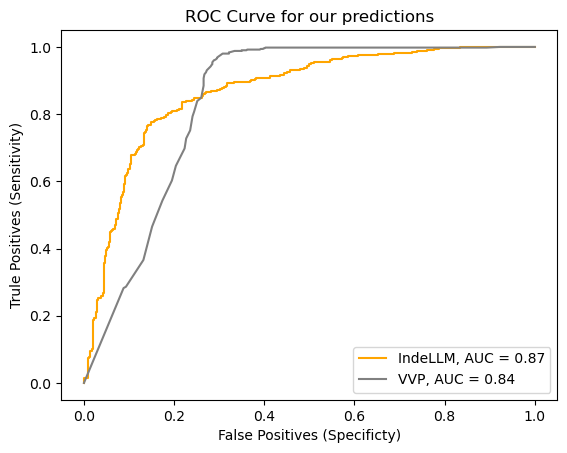

In [65]:
#Some of the columns in VVP contain no prediction, so filer the dataset
keptlabels['VVP'] = pd.to_numeric(keptlabels['VVP'], errors='coerce')
filtered_VVP = keptlabels.dropna(subset=['VVP'])
pred_VVP = filtered_VVP['VVP'].values
truelabels_VVP = filtered_VVP['labels_binary'].values

filtered_VVP.describe()

#Boxplot of VVP
plt.title('VVP predictor results')
sns.boxplot(x = filtered_VVP['labels_cleaned'], y = filtered_VVP['VVP'])
plt.show()

#The VVP predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_VVP -= 1
truelabels_VVP = np.abs(truelabels_VVP) 

#Calculating FP, TN and thresholds
fpr_VVP, tpr_VVP, thersholds_VVP = metrics.roc_curve(truelabels_VVP, pred_VVP)
roc_auc_VVP = round(metrics.auc(fpr_VVP, tpr_VVP), 2)

#Calculating F1 score
tresh_VVP = thersholds_VVP[np.argmax(tpr_VVP - fpr_VVP)]
pred_VVP_bin = [1 if x >= tresh_VVP else 0 for x in pred_VVP]
f1_VVP = f1_score(truelabels_VVP, pred_VVP_bin, average = 'binary')

#Calculating accuary score
accuracy_VVP = accuracy_score(truelabels_VVP, pred_VVP_bin)

#Calculating MCC
mcc_VVP = matthews_corrcoef(truelabels_VVP, pred_VVP_bin)

print("F1 score Combined/IndeLLM best small indels:", f1_best)
print("F1 score VVP small indels:", f1_VVP)

print("Accuracy score Combined/IndeLLM best small indels:", accuracy_best)
print("Accuracy score VVP small indels:", accuracy_VVP)

print("MCC Combined/IndeLLM best small indels:", mcc_best)
print("MCC VVP small indels:", mcc_VVP)

#Plotting the Evo, Fit and VVP AUC 
plt.plot(fpr_best, tpr_best, label = "IndeLLM, AUC = "+str(roc_auc_best), color = "orange")
plt.plot(fpr_VVP, tpr_VVP, label = "VVP, AUC = "+str(roc_auc_VVP), color = "grey")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()

<BarContainer object of 13 artists>

<BarContainer object of 13 artists>

<BarContainer object of 13 artists>

<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x7ba940ee3e30>,
 [Text(0, 0, 'Evo (n = 1074)'),
  Text(1, 0, 'Fit (n = 1074)'),
  Text(2, 0, 'IndeLLM mean (n = 1074)'),
  Text(3, 0, 'IndeLLM best (n = 1074)'),
  Text(4, 0, 'CADD (n = 1073)'),
  Text(5, 0, 'CAPICE (n = 1072)'),
  Text(6, 0, 'PROVEAN (n = 986)'),
  Text(7, 0, 'FATHMM (n = 1061)'),
  Text(8, 0, 'MutT2021 (n = 1012)'),
  Text(9, 0, 'MutPred (n = 1060)'),
  Text(10, 0, 'SIFT (n = 1026)'),
  Text(11, 0, 'VEST (n = 1033)'),
  Text(12, 0, 'VVP (n = 1072)')])

Text(0.5, 1.0, 'F1 and ROC score between methods')

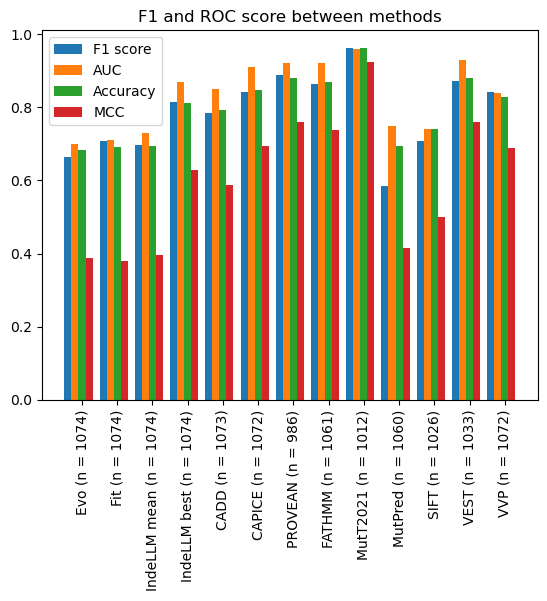

In [66]:
#Plotting the F1 scores together

F1 = pd.DataFrame({'Method': ['Evo', 'Fit', 'IndeLLM mean', 'IndeLLM best', 'CADD', 'CAPICE', 'PROVEAN', 'FATHMM', 'MutT2021', 'MutPred', 'SIFT', 'VEST', 'VVP'], 
      'F1 Score': [f1_evo, f1_fit, f1_combined, f1_best, f1_CADD, f1_CAPICE, f1_PROVEAN, f1_FATHMM, f1_MutationTaster2021, f1_MutPredIndel, f1_SIFT, f1_VEST, f1_VVP], 
      'ROC': [roc_auc_evo, roc_auc_fit, roc_auc_combined, roc_auc_best, roc_auc_CADD, roc_auc_CAPICE, roc_auc_PROVEAN, roc_auc_FATHMM, roc_auc_MutationTaster2021, roc_auc_MutPredIndel, roc_auc_SIFT, roc_auc_VEST, roc_auc_VVP], 
      'Sample size': [len(pred_evo), len(pred_fit), len(pred_combined), len(pred_best), len(pred_CADD),len(pred_CAPICE), len(pred_PROVEAN), len(pred_FATHMM), len(pred_MutationTaster2021), len(pred_MutPredIndel), len(pred_SIFT), len(pred_VEST), len(pred_VVP)], 
      'Accuracy': [accuracy_evo, accuracy_fit, accuracy_combined, accuracy_best, accuracy_CADD, accuracy_CAPICE, accuracy_PROVEAN, accuracy_FATHMM, accuracy_MutationTaster2021, accuracy_MutPredIndel, accuracy_SIFT, accuracy_VEST, accuracy_VVP], 
      'MCC': [mcc_evo, mcc_fit, mcc_combined, mcc_best, mcc_CADD, mcc_CAPICE, mcc_PROVEAN, mcc_FATHMM, mcc_MutationTaster2021, mcc_MutPredIndel, mcc_SIFT, mcc_VEST, mcc_VVP]})


labels = [f"{method} (n = {sample_size})" for method, sample_size in zip(F1['Method'], F1['Sample size'])]

plt.bar(np.arange(len(F1)) - 0.4, F1['F1 Score'], 0.2, label = 'F1 score')
plt.bar(np.arange(len(F1)) - 0.2, F1['ROC'], 0.2, label = 'AUC')
plt.bar(np.arange(len(F1)) , F1['Accuracy'], 0.2, label = 'Accuracy')
plt.bar(np.arange(len(F1)) + 0.2, F1['MCC'], 0.2, label = 'MCC')
plt.xticks(np.arange(len(F1)), labels, rotation=90)
plt.title('F1 and ROC score between methods')
plt.legend(loc = 'best')
plt.show()
